In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Assessing and Univariate Analysis(EDA)**

* Ensure data quality by filtering and rectifying inconsistent, irrelevant, or anomalous data points to prepare for reliable EDA and model building.

  * Verify Data Consistency
  * Filter Irrelevant Data
  * Check Data Types
  * Handle Anomalous Data


In [228]:
train_cs = pd.read_csv('/content/drive/MyDrive/preprocessed_train.csv')
test_cs = pd.read_csv('/content/drive/MyDrive/preprocessed_test.csv')

pd.set_option('display.max_columns', None)

In [229]:
train_cs.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [230]:
test_cs.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,November,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,December,24_,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,September,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434


In [231]:
print(train_cs.shape)
print(test_cs.shape)

(88356, 24)
(44111, 23)


In [232]:
print('Train Information:')
print(train_cs.info())

print('_'*90)
print('_'*90)

print('Test Information:')
print(test_cs.info())

Train Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88356 entries, 0 to 88355
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     88356 non-null  object 
 1   Age                       88356 non-null  object 
 2   Occupation                88356 non-null  object 
 3   Annual_Income             88356 non-null  object 
 4   Monthly_Inhand_Salary     75129 non-null  float64
 5   Num_Bank_Accounts         88356 non-null  int64  
 6   Num_Credit_Card           88356 non-null  int64  
 7   Interest_Rate             88356 non-null  int64  
 8   Num_of_Loan               88356 non-null  object 
 9   Type_of_Loan              78142 non-null  object 
 10  Delay_from_due_date       88356 non-null  int64  
 11  Num_of_Delayed_Payment    82157 non-null  object 
 12  Changed_Credit_Limit      88356 non-null  object 
 13  Num_Credit_Inquiries      88356 non-null  

In [233]:
train_cs.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,75129.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000
mean,4149.422311,17.005104,22.370286,72.649928,21.034621,27.611685,32.299368,1407.407967,187.550210,402.304896
std,3164.217466,117.258805,128.302993,467.361251,14.846641,192.898831,5.108643,8322.103231,182.818667,213.576688
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,0.000000,0.000000,0.095482
25%,1619.936667,3.000000,4.000000,8.000000,10.000000,3.000000,28.067096,29.921581,71.672831,270.066552
50%,3050.206667,6.000000,5.000000,13.000000,18.000000,6.000000,32.321080,68.142341,127.387884,336.673665
75%,5902.378333,7.000000,7.000000,20.000000,28.000000,9.000000,36.508921,155.779989,230.580836,469.630098
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82331.000000,1646.388176,1576.288935


In [234]:
test_cs.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,37532.000000,44111.000000,44111.000000,44111.000000,44111.000000,44111.000000,44111.000000,44111.000000,44111.000000,44111.000000
mean,4147.946490,17.309560,23.190859,70.328739,20.984494,30.370044,32.311697,1507.683011,187.616062,403.108393
std,3159.821491,119.064774,130.536517,458.934981,14.833575,198.690634,5.099591,8664.571418,182.524576,213.775104
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.800587,0.000000,0.000000,0.103402
25%,1620.533542,3.000000,4.000000,7.000000,10.000000,4.000000,28.113969,31.910854,71.692081,270.539727
50%,3057.106250,6.000000,5.000000,13.000000,18.000000,7.000000,32.304656,73.973587,127.720759,337.134000
75%,5889.686875,7.000000,7.000000,20.000000,28.000000,10.000000,36.489503,171.998736,231.002818,470.860226
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000,1539.635702,1606.518192


In [235]:
train_cs.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good


## **Numerical Columns**

### `Age`

In [236]:
train_cs['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [237]:
train_cs['Age'].isnull().sum()

0

In [238]:
train_cs['Age'].value_counts()

,count
Age,
28,2516
31,2489
38,2469
35,2449
32,2445
...,...
1754,1
4732,1
6722,1


In [239]:
train_cs['Age'] = pd.to_numeric(train_cs['Age'], errors='coerce')
test_cs['Age'] = pd.to_numeric(test_cs['Age'], errors='coerce')

In [240]:
print(train_cs['Age'].describe())

print('_'*30)

print(test_cs['Age'].describe())

count    83992.000000
mean       110.590961
std        687.700786
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64
______________________________
count    41935.000000
mean       109.492095
std        680.743795
min       -500.000000
25%         25.000000
50%         34.000000
75%         43.000000
max       8688.000000
Name: Age, dtype: float64


* Age column contains some highly unrealistic numbers (e.g., negative values or values far exceeding a reasonable range like 120)

**Identify rows with values below 0 or above 120**

In [241]:
invalid_ages_in_train = train_cs[(train_cs['Age'] < 0) | (train_cs['Age'] > 120) | (train_cs['Age'].isnull())]
invalid_ages_in_test = test_cs[(test_cs['Age'] < 0) | (test_cs['Age'] > 120) | (test_cs['Age'].isnull())]

In [242]:
print('Invalid ages in train:', invalid_ages_in_train.shape[0])
print('Invalid ages in test:', invalid_ages_in_test.shape[0])

Invalid ages in train: 6729
Invalid ages in test: 3377


Capping values in `Age` columns.

In [243]:
clip_train_cs = train_cs['Age'].clip(lower=18, upper=120)

Compare the distribution of the Age column before and after cleaning to see the impact of our fixes.

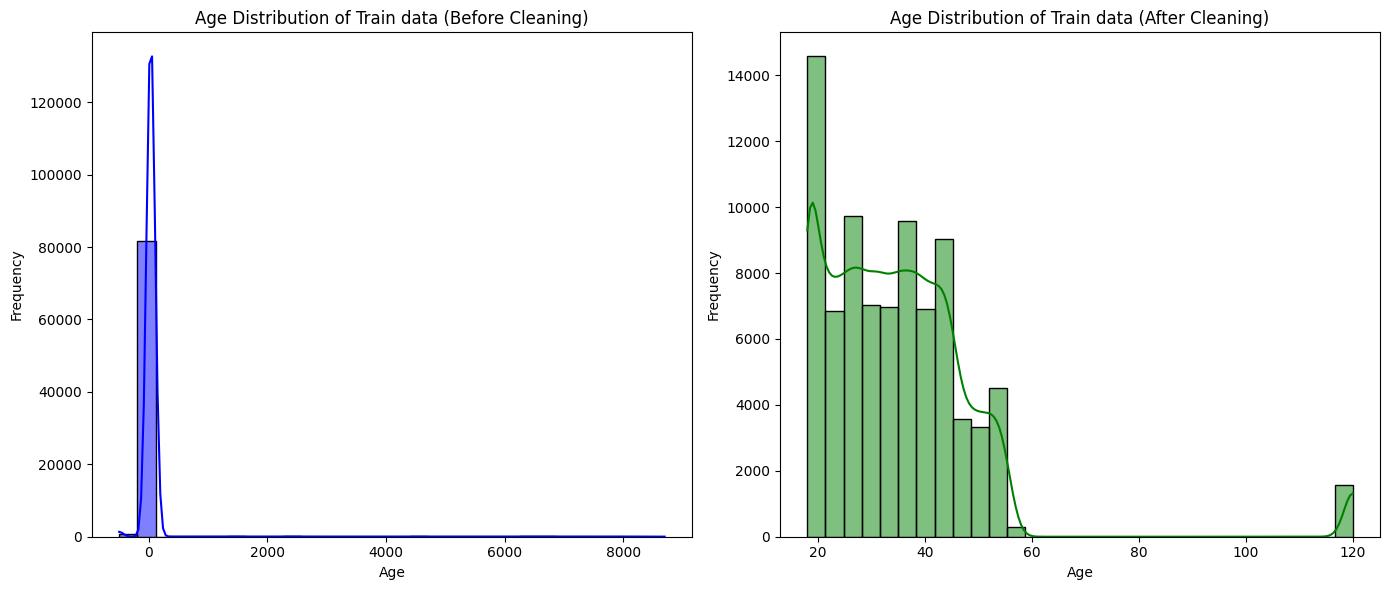

In [244]:
# Plotting before cleaning
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_cs['Age'], kde=True, color='blue', bins=30)
plt.title('Age Distribution of Train data (Before Cleaning)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting after cleaning
plt.subplot(1, 2, 2)
sns.histplot(clip_train_cs, kde=True, color='green', bins=30)
plt.title('Age Distribution of Train data (After Cleaning)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

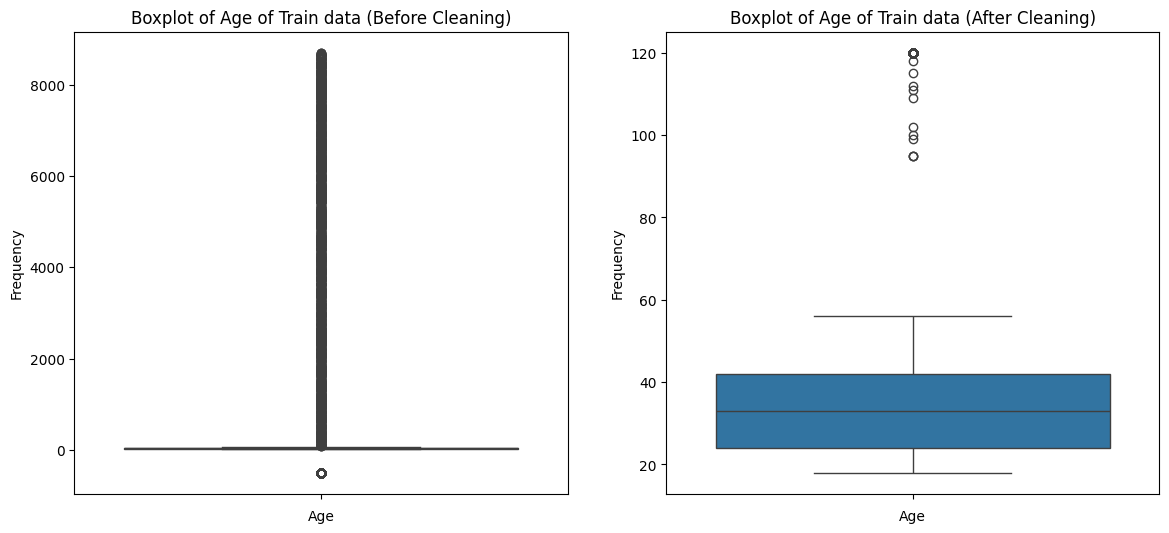

In [245]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.boxplot(train_cs['Age'])
plt.title('Boxplot of Age of Train data (Before Cleaning)')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
sns.boxplot(clip_train_cs)
plt.title('Boxplot of Age of Train data (After Cleaning)')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [246]:
train_cs['Age'] = train_cs['Age'].clip(lower=18, upper=120)
test_cs['Age'] = test_cs['Age'].clip(lower=18, upper=120)

Why Lower Bound = 18 and upper = 120?

* In the credit domain, ages below 18 are irrelevant because no one younger than 18 can legally own a credit card. Keeping those values doesn’t add value to our analysis or model.

* Setting the lower limit to 18 ensures your dataset aligns with the real-world criteria of credit eligibility. This improves model interpretability and performance.

* Data cleaning isn’t just about removing errors; it’s about aligning the data with the problem you're solving. Setting the lower bound to 18 does that perfectly here.


Why Upper Bound = 120?

* The maximum age for humans rarely exceeds 120 years, even though it’s biologically possible. The oldest verified age recorded is 122 years.

* Setting the upper limit to 120 ensures you account for realistic upper bounds while eliminating outliers (e.g., 150 or 200 years), which are clearly data entry errors.

* 120 serves as a safe generalization for most domains, ensuring that no realistic entries are removed, while still catching obvious outliers.

* Although it's rare for someone over 100 to be applying for a credit card, there’s no legal restriction. Some older individuals might still be active credit users.


Compare Train vs Test Age Distribution

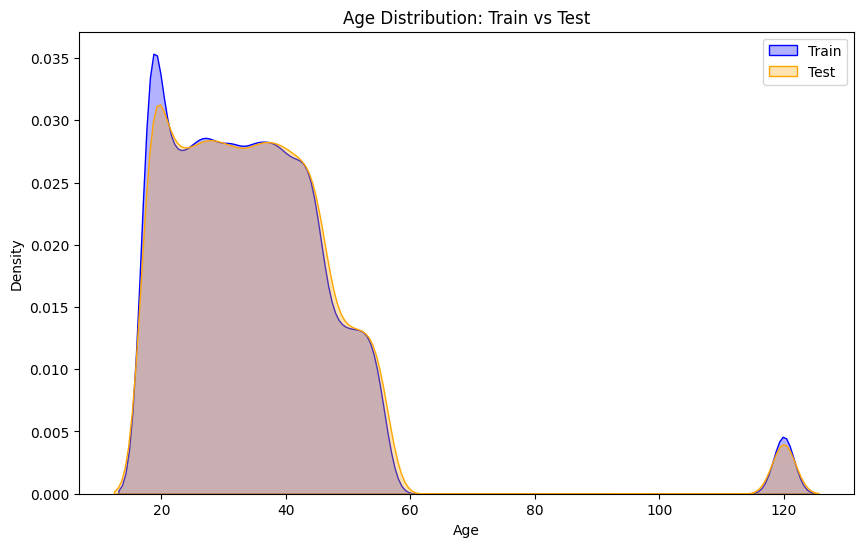

In [247]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_cs['Age'], label='Train', color='blue', fill=True, alpha=0.3)
sns.kdeplot(test_cs['Age'], label='Test', color='orange', fill=True, alpha=0.3)
plt.title('Age Distribution: Train vs Test')
plt.xlabel('Age')
plt.legend()
plt.show()

In [248]:
print(train_cs['Age'].describe())

print('_'*30)

print(test_cs['Age'].describe())

count    83992.000000
mean        34.948436
std         15.811547
min         18.000000
25%         24.000000
50%         33.000000
75%         42.000000
max        120.000000
Name: Age, dtype: float64
______________________________
count    41935.000000
mean        35.408012
std         15.759382
min         18.000000
25%         25.000000
50%         34.000000
75%         43.000000
max        120.000000
Name: Age, dtype: float64


In [249]:
train_cs['Age'].skew()

2.8759869196297916

In [250]:
train_cs['Age'] = np.log(train_cs['Age'])
test_cs['Age'] = np.log(test_cs['Age'])

Text(0, 0.5, 'Frequency')

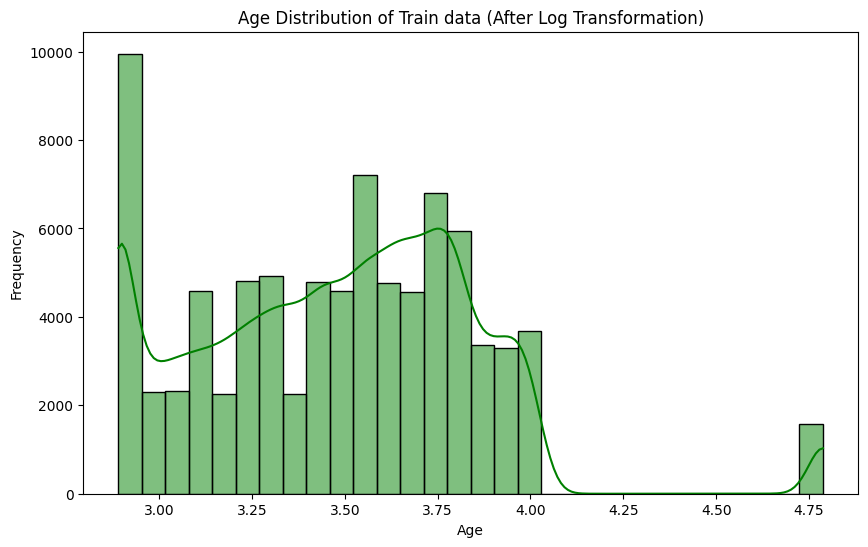

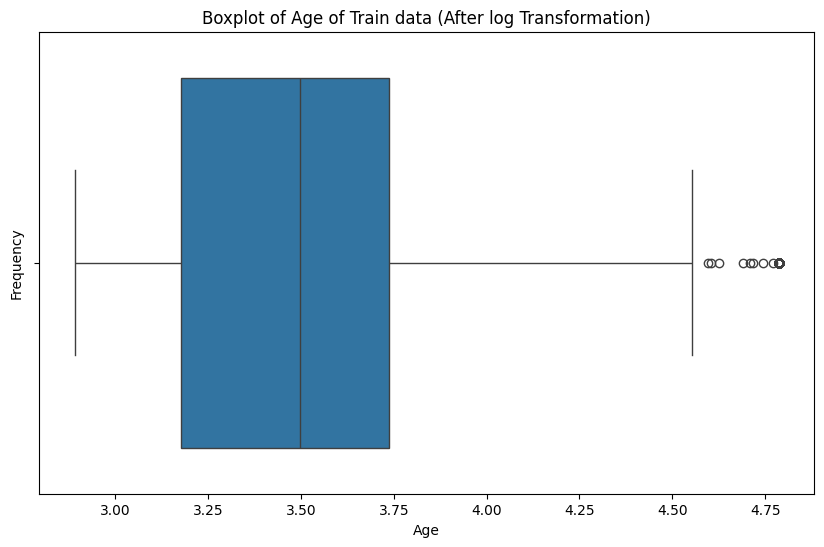

In [251]:
plt.figure(figsize = (10,6))
sns.histplot(train_cs['Age'], kde=True, color='green', bins=30)
plt.title('Age Distribution of Train data (After Log Transformation)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.figure(figsize = (10,6))
sns.boxplot(train_cs['Age'], orient = 'h')
plt.title('Boxplot of Age of Train data (After log Transformation)')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [252]:
train_cs['Age'].skew()

0.5053300565531382

* The `clip()` method is used to cap (limit) the values in a column to a specified range. It ensures that all values in the column fall between the defined lower and upper bounds.

Why use `clip()`?
* To handle outliers quickly: Outliers beyond the specified range are capped, keeping the data within meaningful bounds.

* To avoid removing rows: Instead of dropping rows with outliers, it adjusts their values to make them consistent with the rest of the data.

* Preserves the dataset size: Unlike removing rows, clipping keeps the row count the same, which can be helpful for maintaining context or avoiding data loss.

### `Annual_Income`

In [253]:
train_cs['Annual_Income'] = pd.to_numeric(train_cs['Annual_Income'], errors = 'coerce')
test_cs['Annual_Income'] = pd.to_numeric(test_cs['Annual_Income'], errors = 'coerce')

In [254]:
print('Percentage of missing values in Train:', train_cs['Annual_Income'].isnull().sum() / len(train_cs['Annual_Income'])*100)
print('Percentage of missing values in Test:', test_cs['Annual_Income'].isnull().sum() / len(test_cs['Annual_Income'])*100)

Percentage of missing values in Train: 6.988772692290281
Percentage of missing values in Test: 7.005055428351205


In [255]:
print('Train:')
print(train_cs['Annual_Income'].describe())

print('_'*40)

print('Test:')
print(test_cs['Annual_Income'].describe())

Train:
count    8.218100e+04
mean     1.806965e+05
std      1.457804e+06
min      7.005930e+03
25%      1.930790e+04
50%      3.689844e+04
75%      7.211625e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64
________________________________________
Test:
count    4.102100e+04
mean     1.601456e+05
std      1.303315e+06
min      7.005930e+03
25%      1.933716e+04
50%      3.696389e+04
75%      7.200256e+04
max      2.413726e+07
Name: Annual_Income, dtype: float64


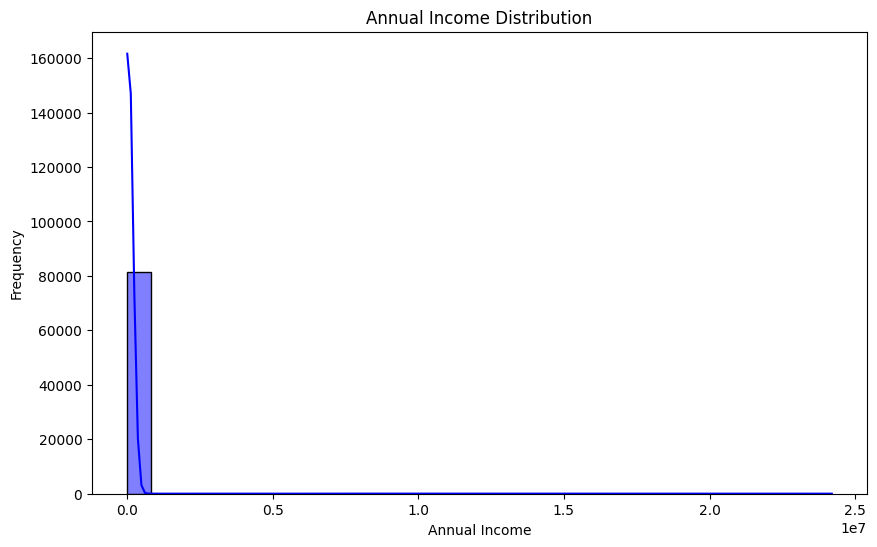

In [256]:
plt.figure(figsize = (10,6))
sns.histplot(train_cs['Annual_Income'], bins=30, kde=True, color='blue')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

* Looking at your visualization, the Annual_Income column seems highly skewed, with a majority of the data clustered near smaller values and some extreme values forming a long tail.

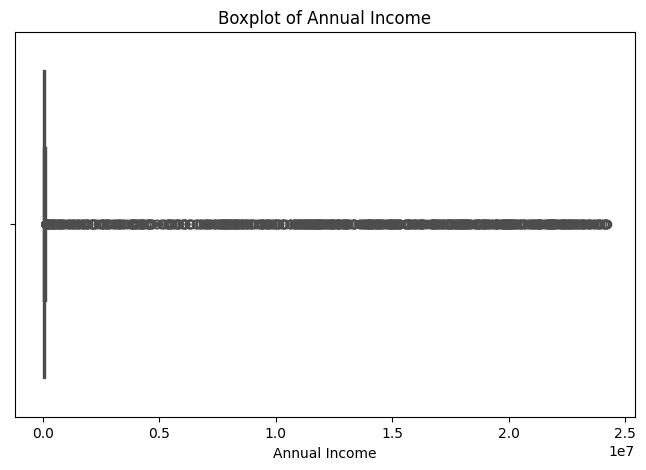

In [257]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = train_cs['Annual_Income'], color='cyan')
plt.title('Boxplot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

In [258]:
train_cs['Annual_Income'].skew()

12.29196447411863


With a skewness of 12.29, the distribution is highly right-skewed

Transforming the `Annual_Income` column now for the following reasons:

* **Better Correlation Analysis**: Skewed data can lead to weak or misleading correlations. A transformation will make relationships clearer.

* **Outlier Influence**: Extreme values may dominate or obscure trends, especially in scatterplots or pairplots. A transformation reduces this risk.

* **Visualization Improvement**: Distribution plots and scatterplots look more interpretable with reduced skewness.

In [259]:
train_cs['Annual_Income'] = np.log(train_cs['Annual_Income'])
test_cs['Annual_Income'] = np.log(test_cs['Annual_Income'])

Text(0.5, 1.0, 'Annual Income Distribution after applying Log Transformation')

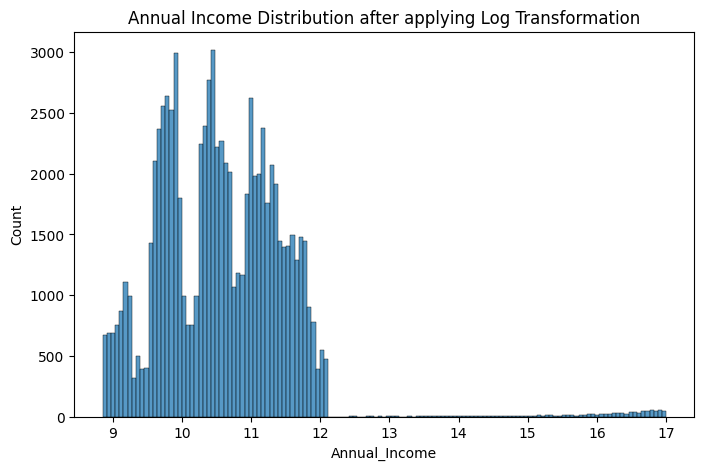

In [260]:
plt.figure(figsize = (8,5))
sns.histplot(train_cs['Annual_Income'])
plt.xlabel('Annual_Income')
plt.ylabel('Count')
plt.title('Annual Income Distribution after applying Log Transformation')

The transformation looks effective! The data now appears to follow a more normalized distribution compared to the earlier skewed one, which is a good outcome.

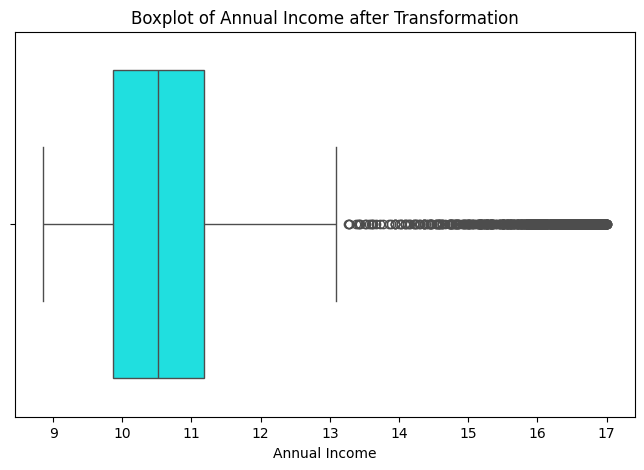

In [261]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = train_cs['Annual_Income'], color='cyan')
plt.title('Boxplot of Annual Income after Transformation')
plt.xlabel('Annual Income')
plt.show()

In [262]:
train_cs['Annual_Income'].skew()

1.8818510264868928

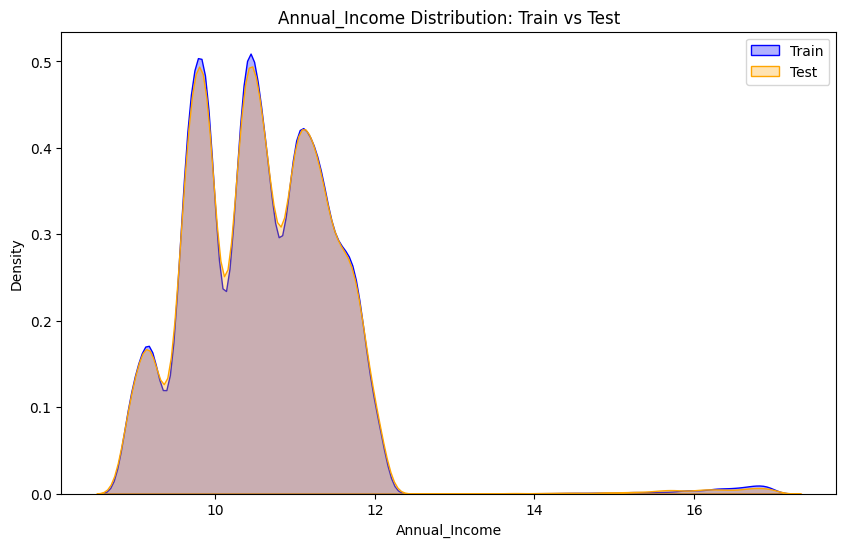

In [263]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train_cs['Annual_Income'], label='Train', color='blue', fill=True, alpha=0.3)
sns.kdeplot(test_cs['Annual_Income'], label='Test', color='orange', fill=True, alpha=0.3)
plt.title('Annual_Income Distribution: Train vs Test')
plt.xlabel('Annual_Income')
plt.legend()
plt.show()

**Documentation: Annual_Income Column**
* Data Type: Converted to float format for accurate numerical operations.
* Missing Values:
  * Train Dataset: ~6% missing values (6175 rows).
  * Test Dataset: ~7% missing values.
  * Missing values will be handled during the feature engineering phase.
* Highly skewed distribution with a skewness value of 12.29.
* Log transformation using `np.log` was applied on both `train_cs` and `test_cs` to reduce skewness.
* Outliers still exist but will be addressed during feature engineering.
* Converted data type to `float`.
* After transformation skeweness is 1.881 i.e moderately symmetric


### `Monthly_Inhand_Salary`

In [264]:
train_cs['Monthly_Inhand_Salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Monthly_Inhand_Salary
Non-Null Count  Dtype  
--------------  -----  
75129 non-null  float64
dtypes: float64(1)
memory usage: 690.4 KB


In [265]:
print('Percentage of Missing value in Train', train_cs['Monthly_Inhand_Salary'].isnull().sum() / len(train_cs['Monthly_Inhand_Salary']) * 100)
print('Percentage of Missing value in Test', test_cs['Monthly_Inhand_Salary'].isnull().sum() / len(test_cs['Monthly_Inhand_Salary']) * 100)

Percentage of Missing value in Train 14.970120874643488
Percentage of Missing value in Test 14.914647140169118


In [266]:
print('Train:')
print(train_cs['Monthly_Inhand_Salary'].describe())

print('_'*40)

print('Test:')
print(test_cs['Monthly_Inhand_Salary'].describe())

Train:
count    75129.000000
mean      4149.422311
std       3164.217466
min        303.645417
25%       1619.936667
50%       3050.206667
75%       5902.378333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64
________________________________________
Test:
count    37532.000000
mean      4147.946490
std       3159.821491
min        303.645417
25%       1620.533542
50%       3057.106250
75%       5889.686875
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


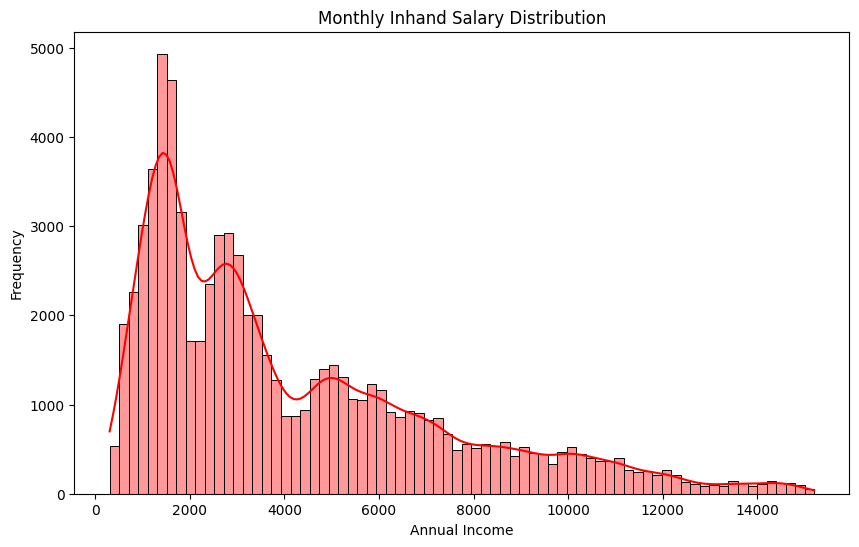

In [267]:
plt.figure(figsize = (10,6))
sns.histplot(train_cs['Monthly_Inhand_Salary'], kde = True, color = 'red', alpha = 0.4)
plt.title('Monthly Inhand Salary Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

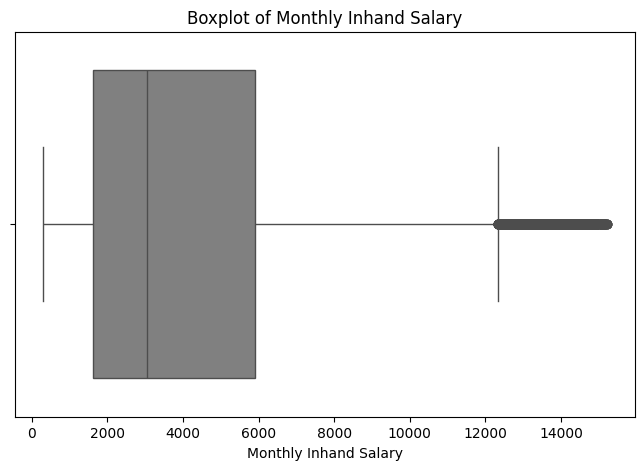

In [268]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = train_cs['Monthly_Inhand_Salary'], color='grey')
plt.title('Boxplot of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.show()

In [269]:
train_cs['Monthly_Inhand_Salary'].skew()

1.1502727599455158

**Documentation: `Monthly_Inhand_Salary` Column**
* Train Dataset: 14.97% of values are missing.
* Test Dataset: 14.91% of values are missing.
* The distribution of the column is slightly right-skewed with a skewness value of 1.150.
* The skewness (1.150) suggests mild skewness, but it's not extreme enough to warrant immediate transformation.
* Missing values will be imputed during the Feature Engineering phase.
* Visual inspection of the distribution suggests the presence of some outliers in the higher salary range.
* These outliers will also be addressed during the Feature Engineering phase.

**Why Handle Missing Values and Outliers During Feature Engineering?**
* By deferring imputation to the feature engineering phase, we can leverage insights from bivariate and multivariate analysis.
* Decisions on whether to use the median, mean, or predictive models will be more informed after exploring the column's interactions with others.
* Removing or capping outliers prematurely may distort relationships. In the feature engineering phase
* Outliers can have significant effects on relationships with other features. Handling them later ensures that these relationships are considered before making adjustments.
* By delaying these steps, we avoid making premature adjustments that could impact exploratory analysis and insights.

### `Num_Bank_Accounts`

In [270]:
train_cs['Num_Bank_Accounts'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Num_Bank_Accounts
Non-Null Count  Dtype
--------------  -----
88356 non-null  int64
dtypes: int64(1)
memory usage: 690.4 KB


In [271]:
print('Train:')
print(train_cs['Num_Bank_Accounts'].describe())

print('_'*40)

print('Test:')
print(test_cs['Num_Bank_Accounts'].describe())

Train:
count    88356.000000
mean        17.005104
std        117.258805
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64
________________________________________
Test:
count    44111.000000
mean        17.309560
std        119.064774
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64


In [272]:
print('Missing Value in Train:', train_cs['Num_Bank_Accounts'].isnull().sum())
print('Missing Values in Test:', test_cs['Num_Bank_Accounts'].isnull().sum())

Missing Value in Train: 0
Missing Values in Test: 0


In [273]:
train_cs['Num_Bank_Accounts'].value_counts()

,count
Num_Bank_Accounts,
6,11539
7,11339
8,11265
4,10780
5,10733
...,...
726,1
1470,1
887,1


* From the value counts, it is evident that most individuals have between 4 and 8 bank accounts, which seems realistic for general populations. However, there are some very high and unrealistic values, such as 726, 1470, 887, 211, and 697. It's highly improbable for anyone to have hundreds or thousands of bank accounts, suggesting the presence of outliers or data issues.

* Unusual values like 726, 1470, 887, etc., indicate data anomalies or errors.

These extreme values might:
* Be the result of incorrect data entry.
* Represent rare cases that require further investigation.

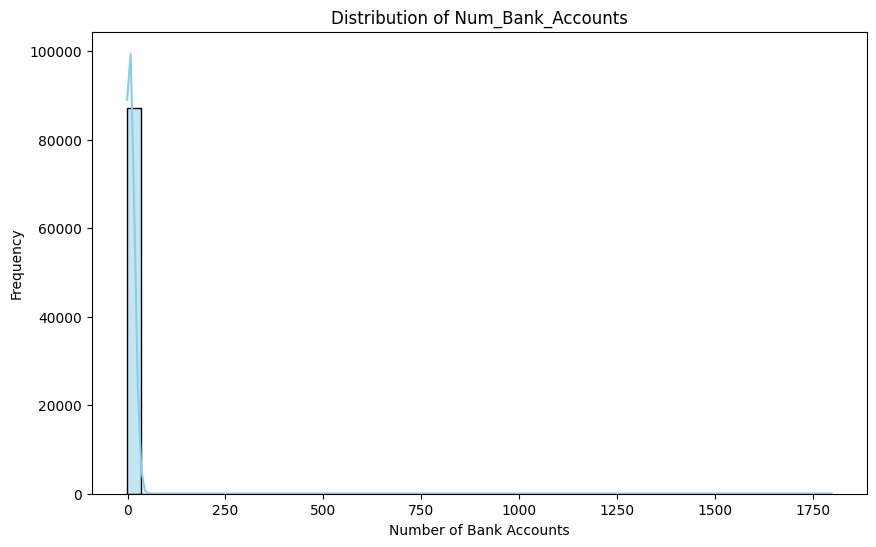

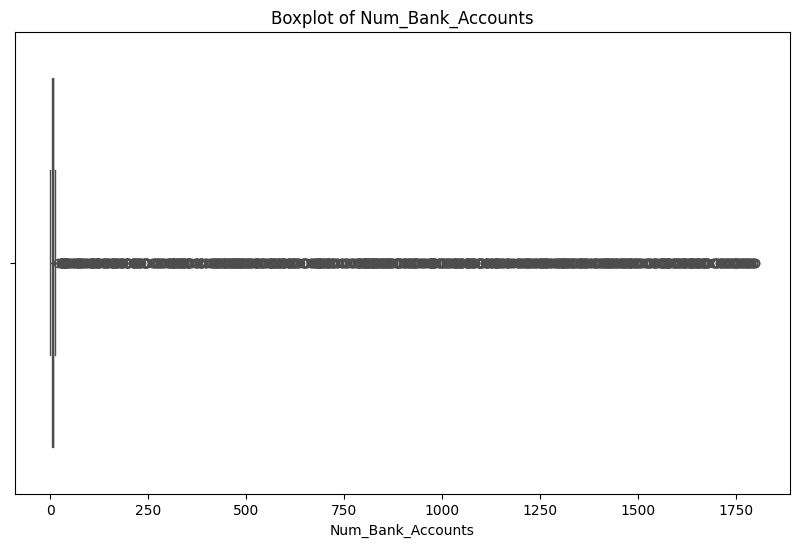

In [274]:
plt.figure(figsize=(10, 6))
sns.histplot(train_cs['Num_Bank_Accounts'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Num_Bank_Accounts")
plt.xlabel("Number of Bank Accounts")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cs['Num_Bank_Accounts'], color='orange')
plt.title("Boxplot of Num_Bank_Accounts")
plt.show()

In [275]:
train_cs['Num_Bank_Accounts'].skew()

11.265796269149886

* Based on the distribution, the majority of values lie between 4 and 8 bank accounts, which seems reasonable.
* Values beyond a certain realistic threshold (e.g., 20 bank accounts) could be considered outliers.

**Handle Negative Values**
* `-1` (Invalid, as the number of bank accounts cannot be negative).

In [276]:
train_cs[train_cs['Num_Bank_Accounts'] == -1]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
26811,March,3.663562,Engineer,11.762171,10434.146667,-1,6,1,2_,"Auto Loan, and Not Specified",5,3,9.49,6.0,Good,1151.7,40.586736,22 Years and 5 Months,No,196.587321,230.922386,High_spent_Large_value_payments,855.904960,Standard
26812,April,3.688879,Engineer,11.762171,NaN,-1,6,1,2,"Auto Loan, and Not Specified",5,6,14.49,6.0,Good,1151.7_,39.369401,22 Years and 6 Months,No,196.587321,524.304418,Low_spent_Large_value_payments,592.522928,Good
26813,May,3.688879,Engineer,11.762171,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",1,8,9.49,6.0,Good,1151.7,28.702053,22 Years and 7 Months,No,196.587321,150.096675,High_spent_Large_value_payments,936.730670,Good
26814,June,3.688879,Engineer,11.762171,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",5,6,9.49,6.0,Good,1151.7,34.808390,22 Years and 8 Months,No,196.587321,1006.698069,Low_spent_Medium_value_payments,120.129276,Good
26815,July,3.688879,Engineer,11.762171,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",9,3,9.49,6.0,Good,1151.7,35.206427,NaN,No,42850.000000,172.992021,High_spent_Large_value_payments,913.835324,Good
26816,August,3.688879,Engineer,16.912757,NaN,-1,6,1,2,"Auto Loan, and Not Specified",10,6,9.49,6.0,_,1151.7,38.278518,22 Years and 10 Months,No,196.587321,338.672303,High_spent_Medium_value_payments,758.155042,Good
38657,February,3.988984,Engineer,11.677177,9870.922500,-1,6,7,0,NaN,27,1,4.97,1.0,Good,607.78,37.286105,20 Years and 6 Months,No,0.000000,668.144454,!@9#%8,588.947796,Poor
38658,March,3.988984,Engineer,11.677177,9870.922500,-1,6,7,0,NaN,27,1,0.9699999999999998,1.0,Good,607.78,41.915627,20 Years and 7 Months,No,0.000000,142.319789,High_spent_Large_value_payments,1084.772461,Poor
38659,April,3.988984,Engineer,11.677177,9870.922500,-1,6,7,0,NaN,27,1,4.97,1.0,Good,607.78,41.799942,20 Years and 8 Months,No,0.000000,467.563923,High_spent_Small_value_payments,779.528327,Poor
38660,June,3.988984,Engineer,11.677177,9870.922500,-1,6,7,0,NaN,22,1,4.97,1.0,Good,607.78,32.303737,20 Years and 10 Months,No,0.000000,218.005223,High_spent_Medium_value_payments,1019.087027,Poor


* Handle negative values (-1) by replacing them with a valid statistic, such as the median or mode.

* In our case medain and mode value is 6

In [277]:
mode_value_train = train_cs['Num_Bank_Accounts'].mode()[0]
mode_value_test = test_cs['Num_Bank_Accounts'].mode()[0]

In [278]:
train_cs['Num_Bank_Accounts'] = train_cs['Num_Bank_Accounts'].apply(lambda x: mode_value_train if x < 0 else x)
test_cs['Num_Bank_Accounts'] = test_cs['Num_Bank_Accounts'].apply(lambda x: mode_value_test if x < 0 else x)

* There are also extremely high values like (726, 1470, 887), etc., indicate potential errors or rare cases.

* Most values fall between 4 and 8, as shown in the value counts. This is reasonable for the general population.


**Capping the Outliers**

In [279]:
Q1 = train_cs['Num_Bank_Accounts'].quantile(0.25)
Q3 = train_cs['Num_Bank_Accounts'].quantile(0.75)

print('Q1:', Q1, '\nQ3:', Q3)

IQR = Q3 - Q1
print('IQR:', IQR)

Q1: 3.0 
Q3: 7.0
IQR: 4.0


In [280]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower_bound:', lower_bound, '\nupper_bound:', upper_bound)

lower_bound: -3.0 
upper_bound: 13.0


In [281]:
threshold  = train_cs['Num_Bank_Accounts'].quantile(0.95)
print('Threshold Value:', threshold)

Threshold Value: 10.0


In [282]:
train_cs['Num_Bank_Accounts'] = train_cs['Num_Bank_Accounts'].apply(lambda x: min(x, threshold))
test_cs['Num_Bank_Accounts'] = test_cs['Num_Bank_Accounts'].apply(lambda x: min(x, threshold))

`train_cs['Num_Bank_Accounts']`: This selects the Num_Bank_Accounts column from the train_cs DataFrame.

`.apply(lambda x: min(x, threshold))`: This applies the lambda function to each value in the Num_Bank_Accounts column.

The lambda function lambda x: `min(x, threshold)` takes a single argument x, which represents each value in the column.

It then calculates the minimum value between x and threshold. This effectively caps the values in the column at the specified threshold.

In [283]:
print('Train:')
print(train_cs['Num_Bank_Accounts'].describe())

print('_'*40)

print('Test:')
print(test_cs['Num_Bank_Accounts'].describe())

Train:
count    88356.000000
mean         5.425800
std          2.624287
min          0.000000
25%          3.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: Num_Bank_Accounts, dtype: float64
________________________________________
Test:
count    44111.000000
mean         5.419963
std          2.628149
min          0.000000
25%          3.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: Num_Bank_Accounts, dtype: float64


* The range now appears logical, avoiding extreme outliers like 1798.
* The capped values align with realistic expectations for the number of bank accounts (0–10).
* The majority of values are concentrated around 4–8 accounts, which seems reasonable for most individuals.

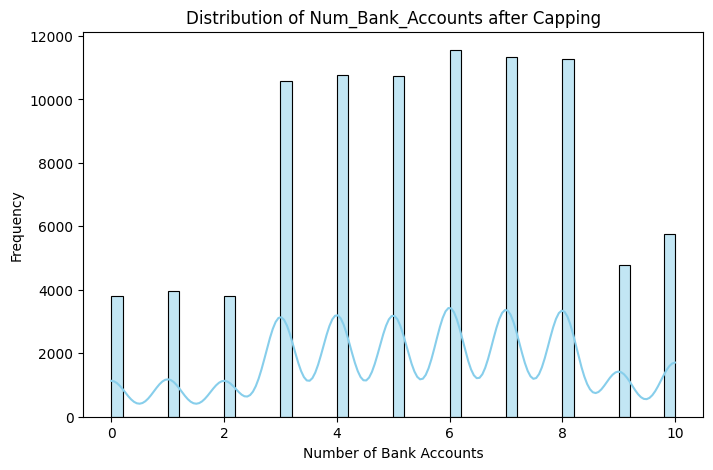

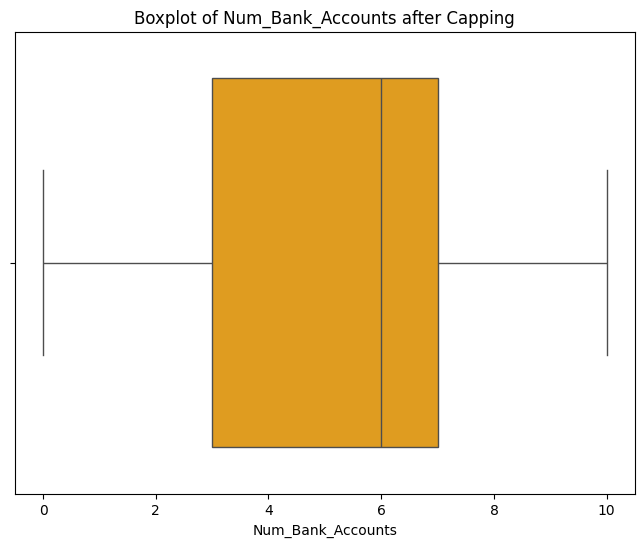

In [284]:
plt.figure(figsize=(8, 5))
sns.histplot(train_cs['Num_Bank_Accounts'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Num_Bank_Accounts after Capping")
plt.xlabel("Number of Bank Accounts")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Num_Bank_Accounts'], color='orange')
plt.title("Boxplot of Num_Bank_Accounts after Capping")
plt.show()

**Document for Num_Bank_Accounts**
* Missing Values: None.
* Minimum Value: -1 (Invalid and replaced).
* Maximum Value: 1798 (Outlier, capped).
* Mean Value: 6.
* 75th Percentile: 7.
*  -1 (invalid value) with the column's mode (6).
* Capped values beyond the 95th percentile to ensure data consistency.
* After preprocessing, the column's statistics and distribution were revalidated, and they now align with realistic expectations.



### `Num_Credit_Card`

In [285]:
train_cs['Num_Credit_Card'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Num_Credit_Card
Non-Null Count  Dtype
--------------  -----
88356 non-null  int64
dtypes: int64(1)
memory usage: 690.4 KB


In [286]:
train_cs['Num_Credit_Card'].isnull().sum()

0

In [287]:
train_cs['Num_Credit_Card'].describe()

,Num_Credit_Card
count,88356.000000
mean,22.370286
std,128.302993
min,0.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,1499.000000


* The range appears to extend up to 1400+, which is unrealistic for the number of credit cards a person might have.
* Most values are concentrated at the lower end, likely within a reasonable range (0–10 or similar).

In [288]:
train_cs['Num_Credit_Card'].value_counts().head(15).sort_values(ascending = False)

,count
Num_Credit_Card,
5,16329
7,14743
6,14626
4,12465
3,11689
8,4360
10,4243
9,4093
2,1885


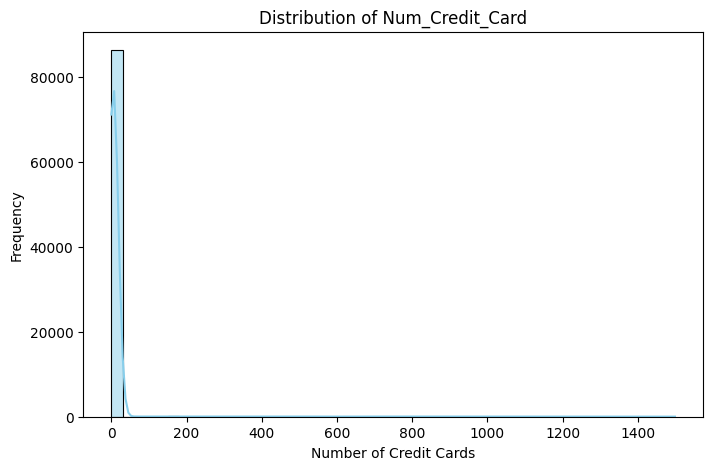

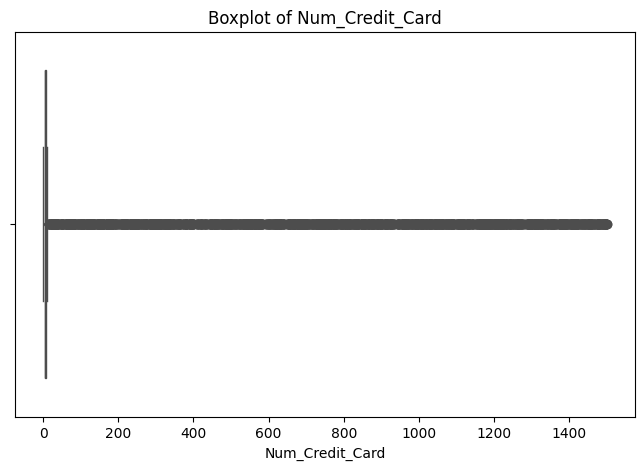

In [289]:
plt.figure(figsize=(8, 5))
sns.histplot(train_cs['Num_Credit_Card'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Num_Credit_Card")
plt.xlabel("Number of Credit Cards")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize = (8,5))
sns.boxplot(train_cs['Num_Credit_Card'], color = 'orange', orient = 'h')
plt.xlabel('Num_Credit_Card')
plt.title('Boxplot of Num_Credit_Card')
plt.show()

In [290]:
train_cs['Num_Credit_Card'].skew()

8.474388095932213

* The distribution is heavily right-skewed, indicating the presence of extreme outliers.

**Capping Outliers**

In [291]:
print('95 percentile:', train_cs['Num_Credit_Card'].quantile(0.95))
print('99 percentile:', train_cs['Num_Credit_Card'].quantile(0.99))

95 percentile: 10.0
99 percentile: 837.0


In [292]:
threshold  = train_cs['Num_Credit_Card'].quantile(0.95)
print('Threshold Value:', threshold)

Threshold Value: 10.0


In [293]:
train_cs['Num_Credit_Card'] = train_cs['Num_Credit_Card'].apply(lambda x: min(x, threshold))
test_cs['Num_Credit_Card'] = test_cs['Num_Credit_Card'].apply(lambda x: min(x, threshold))

In [294]:
print('Train:')
print(train_cs['Num_Credit_Card'].describe())

print('_'*40)

print('Test:')
print(test_cs['Num_Credit_Card'].describe())

Train:
count    88356.000000
mean         5.632690
std          2.144699
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Num_Credit_Card, dtype: float64
________________________________________
Test:
count    44111.000000
mean         5.632949
std          2.154811
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Num_Credit_Card, dtype: float64


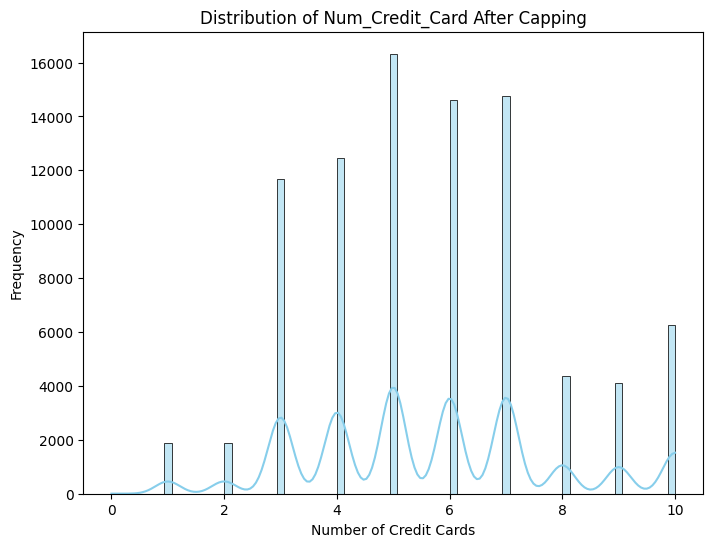

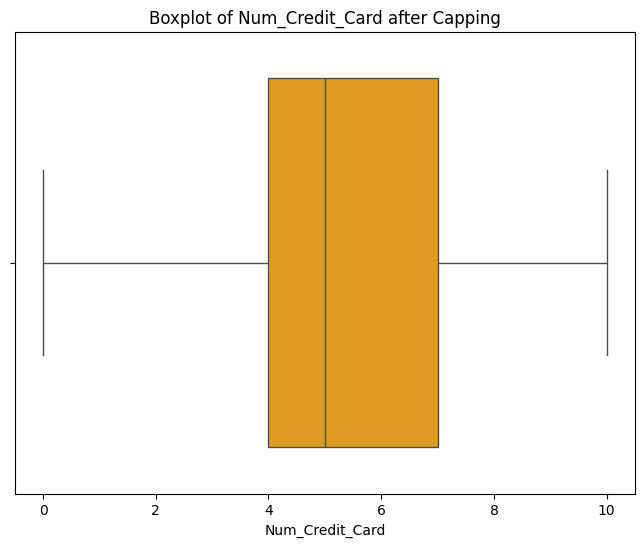

In [295]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Num_Credit_Card'], kde=True, color='skyblue')
plt.title('Distribution of Num_Credit_Card After Capping')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Num_Credit_Card'], color='orange')
plt.title("Boxplot of Num_Credit_Card after Capping")
plt.show()

Column Name: `Num_Credit_Card`
**Initial Observations:**
* Data Type: Numerical (Integer)
* Null Values: 0 (No missing values)
* Distribution:
  * Highly right-skewed with extreme outliers.
  * Observed rare and unrealistic values like 849, 183, and 159.

**Steps Taken:**
* Outliers were skewing the distribution and could negatively impact model performance.
* Capped all values above the 95th percentile to the 95th percentile value.
* After capping, the data no longer required additional transformation (e.g., log transformation) as the distribution became realistic

### `Interest_Rate`

In [296]:
train_cs['Interest_Rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Interest_Rate
Non-Null Count  Dtype
--------------  -----
88356 non-null  int64
dtypes: int64(1)
memory usage: 690.4 KB


In [297]:
print('Train:')
print(train_cs['Interest_Rate'].describe())

print('_'*40)

print('Test:')
print(test_cs['Interest_Rate'].describe())

Train:
count    88356.000000
mean        72.649928
std        467.361251
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max       5797.000000
Name: Interest_Rate, dtype: float64
________________________________________
Test:
count    44111.000000
mean        70.328739
std        458.934981
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max       5799.000000
Name: Interest_Rate, dtype: float64


In [298]:
print('Missing Value in Train:', train_cs['Interest_Rate'].isnull().sum())
print('Missing Values in Test:', test_cs['Interest_Rate'].isnull().sum())

Missing Value in Train: 0
Missing Values in Test: 0


In [299]:
train_cs['Interest_Rate'].value_counts()

,count
Interest_Rate,
8,4434
5,4410
6,4188
12,4035
7,3990
...,...
5135,1
1767,1
2226,1


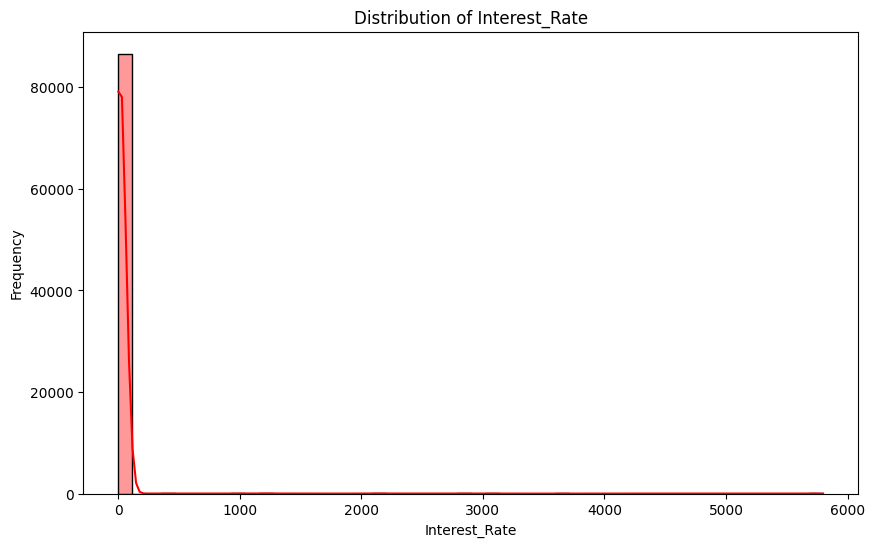

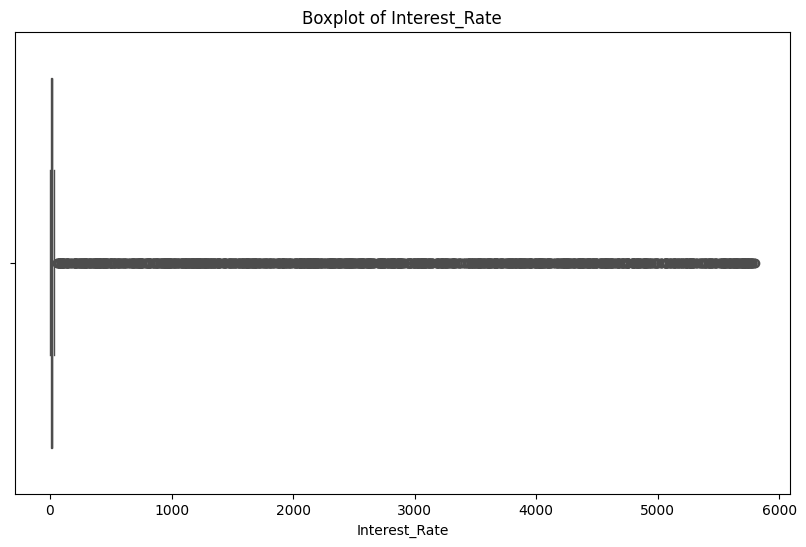

In [300]:
plt.figure(figsize=(10, 6))
sns.histplot(train_cs['Interest_Rate'], bins=50, kde=True, color='red', alpha = 0.4)
plt.title("Distribution of Interest_Rate")
plt.xlabel("Interest_Rate")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cs['Interest_Rate'], color='orange')
plt.title("Boxplot of Interest_Rate")
plt.show()

In [301]:
train_cs['Interest_Rate'].skew()

8.991616429337013

In [302]:
print('95 percentile:', train_cs['Interest_Rate'].quantile(0.95))
print('99 percentile:', train_cs['Interest_Rate'].quantile(0.99))

95 percentile: 33.0
99 percentile: 2874.0


In [303]:
Q1 = train_cs['Interest_Rate'].quantile(0.25)
Q3 = train_cs['Interest_Rate'].quantile(0.75)

print('Q1:', Q1, '\nQ3:', Q3)

IQR = Q3 - Q1
print('IQR:', IQR)

Q1: 8.0 
Q3: 20.0
IQR: 12.0


In [304]:
lower_bound_ir = Q1 - 1.5 * IQR
upper_bound_ir = Q3 + 1.5 * IQR

print('lower_bound:', lower_bound_ir, '\nupper_bound:', upper_bound_ir)

lower_bound: -10.0 
upper_bound: 38.0


In [305]:
threshold  = train_cs['Interest_Rate'].quantile(0.95)
print('Threshold Value:', threshold)

Threshold Value: 33.0


In [306]:
train_cs['Interest_Rate'] = train_cs['Interest_Rate'].apply(lambda x: min(x, threshold))
test_cs['Interest_Rate'] = test_cs['Interest_Rate'].apply(lambda x: min(x, threshold))

In [307]:
print('Train:')
print(train_cs['Interest_Rate'].describe())

print('_'*40)

print('Test:')
print(test_cs['Interest_Rate'].describe())

Train:
count    88356.000000
mean        14.877982
std          9.000715
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max         33.000000
Name: Interest_Rate, dtype: float64
________________________________________
Test:
count    44111.000000
mean        14.824443
std          8.997025
min          1.000000
25%          7.000000
50%         13.000000
75%         20.000000
max         33.000000
Name: Interest_Rate, dtype: float64


* The mean has shifted to a more reasonable value (14.88) compared to the extreme mean (72.65) before capping.
* The standard deviation has reduced significantly, indicating better
consistency in the data.
* The maximum value is now capped at 33, much lower than the original 5797, which effectively addresses outliers.
* The 25th, 50th (median), and 75th percentiles remain realistic and unaffected by extreme values.

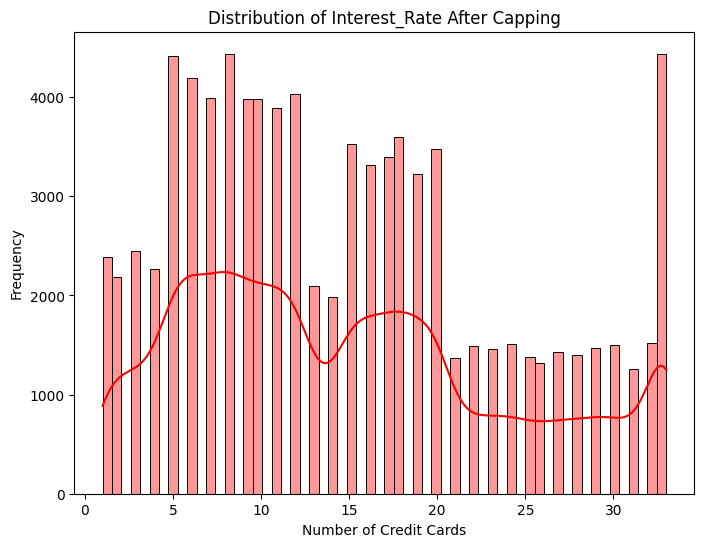

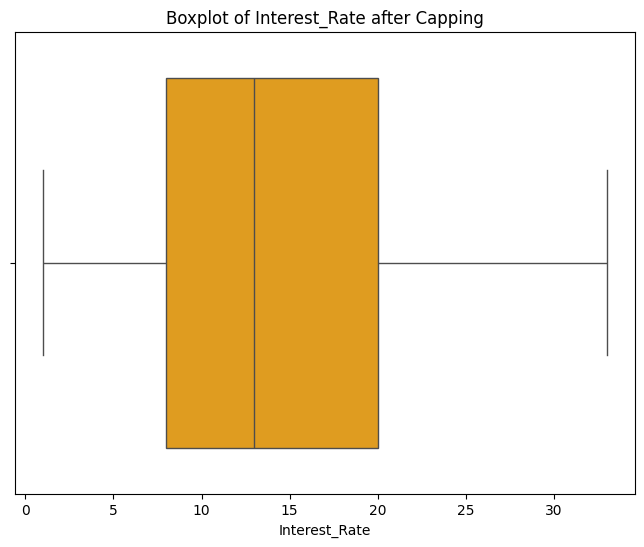

In [308]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Interest_Rate'], kde=True, color='red', alpha = 0.4)
plt.title('Distribution of Interest_Rate After Capping')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Interest_Rate'], color='orange')
plt.title("Boxplot of Interest_Rate after Capping")
plt.show()

In [309]:
print('Skewness after Capping:', train_cs['Interest_Rate'].skew())

Skewness after Capping: 0.4809405759288817


* skewness is < |1|, the distribution is approximately normal, and no further transformation is required.

**Document `Interest_Rate**`
* Capped values are within a realistic range and represent a well-handled distribution.

### `Num_of_Loan`

In [310]:
train_cs['Num_of_Loan'] = pd.to_numeric(train_cs['Num_of_Loan'], errors = 'coerce')
test_cs['Num_of_Loan'] = pd.to_numeric(test_cs['Num_of_Loan'], errors = 'coerce')

In [311]:
train_cs['Num_of_Loan'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Num_of_Loan
Non-Null Count  Dtype  
--------------  -----  
84132 non-null  float64
dtypes: float64(1)
memory usage: 690.4 KB


In [312]:
print('Percentage of Missing Value in Train:',train_cs['Num_of_Loan'].isnull().sum() / len(train_cs['Num_of_Loan'] * 100))
print('Percentage of Missing Value in Test:',test_cs['Num_of_Loan'].isnull().sum() / len(test_cs['Num_of_Loan'] * 100))

Percentage of Missing Value in Train: 0.04780660057041967
Percentage of Missing Value in Test: 0.04844596585885607


In [313]:
print('Train:')
print(train_cs['Num_of_Loan'].describe())

print('_'*40)

print('Test:')
print(test_cs['Num_of_Loan'].describe())

Train:
count    84132.000000
mean         2.658572
std         61.222873
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1495.000000
Name: Num_of_Loan, dtype: float64
________________________________________
Test:
count    41974.000000
mean         3.063373
std         65.923836
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64


* Minimum value: -100 (impossible for loans! Likely erroneous data).
* Maximum value: 1495 (far from the 75th percentile of 5, indicating extreme outliers).
* Mean (2.65) vs. Median (3) suggests a skewed distribution influenced by these extreme values.

In [314]:
train_cs['Num_of_Loan'].value_counts()

,count
Num_of_Loan,
3.0,12742
2.0,12650
4.0,12334
0.0,9302
1.0,8957
...,...
172.0,1
745.0,1
103.0,1


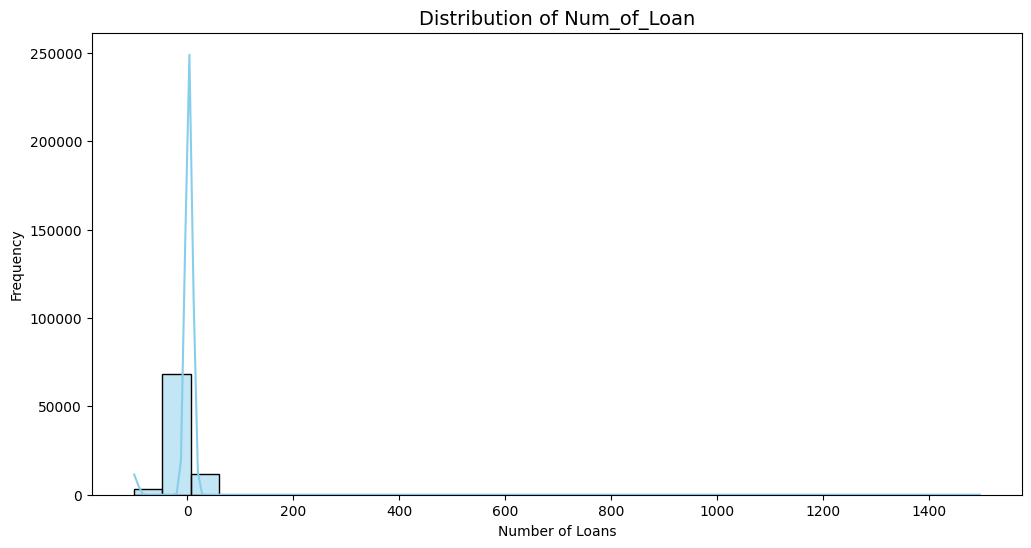

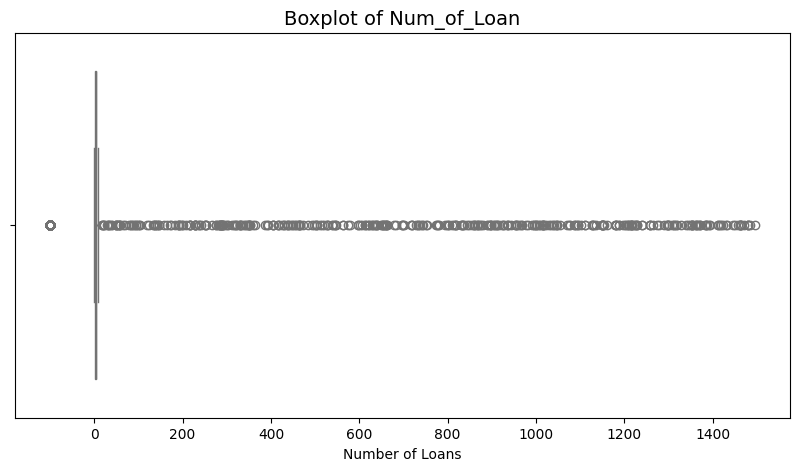

In [315]:
plt.figure(figsize=(12, 6))
sns.histplot(train_cs['Num_of_Loan'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Num_of_Loan", fontsize=14)
plt.xlabel("Number of Loans")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=train_cs['Num_of_Loan'], color='lightgreen')
plt.title("Boxplot of Num_of_Loan", fontsize=14)
plt.xlabel("Number of Loans")
plt.show()


* Null values can cause issues during subsequent steps, like detecting negatives or calculating percentiles for outlier handling.
* Ussing a simple imputation strategy (e.g., median) to fill the missing values.

**Missing Value Imputation**

In [316]:
train_median = train_cs['Num_of_Loan'].median()
test_median = test_cs['Num_of_Loan'].median()

print('Train Median:', train_median)
print('Train Median:', test_median)

Train Median: 3.0
Train Median: 3.0


In [317]:
train_cs['Num_of_Loan'].fillna(train_median, inplace=True)
test_cs['Num_of_Loan'].fillna(train_median, inplace=True)

<ipython-input-317-7d3d3a15e613>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_cs['Num_of_Loan'].fillna(train_median, inplace=True)
<ipython-input-317-7d3d3a15e613>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [318]:
train_cs['Num_of_Loan'].isnull().sum()

0

**Handling Negative Numbers(-100)**

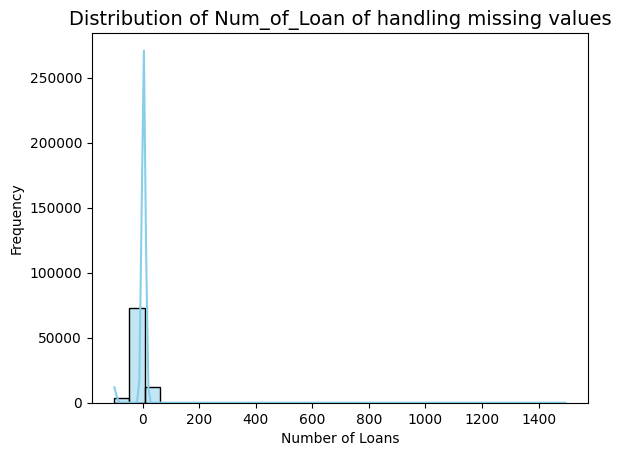

In [319]:
sns.histplot(train_cs['Num_of_Loan'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Num_of_Loan of handling missing values", fontsize=14)
plt.xlabel("Number of Loans")
plt.ylabel("Frequency")
plt.show()

* The distribution after handling missing values (as shown in the plot) is realistic and not overly skewed.
* Imputing -100 with the median maintains the continuity of the data and avoids introducing new bias or anomalies.
* Median imputation is robust to outliers and aligns with how you've handled missing values.

* After filling nulls, address any erroneous values (e.g., -100 loans). This ensures the data is realistic before moving on to outlier detection.

In [320]:
train_cs['Num_of_Loan'].value_counts().head(15)

,count
Num_of_Loan,
3.0,16966
2.0,12650
4.0,12334
0.0,9302
1.0,8957
6.0,6514
5.0,6053
7.0,6047
-100.0,3415


* `Num_of_Loan` likely represents the number of loans a person has taken. Negative values like -100.0 are not meaningful in this context and might represent:
  * Missing or incorrectly recorded values.
  * An outlier or a data entry error.

In [321]:
train_cs[train_cs['Num_of_Loan'] == -100]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
28,August,4.007333,Entrepreneur,10.331689,2612.490833,2.0,5.0,4.0,-100.0,Not Specified,4,9,1.99,4.0,Good,632.46,27.332515,17 Years and 10 Months,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,Standard
31,March,3.044522,Developer,10.478631,2853.309167,7.0,5.0,5.0,-100.0,NaN,5,12,2.58,4.0,Standard,943.86,23.462303,30 Years and 10 Months,Yes,0.000000,173.138651,Low_spent_Medium_value_payments,392.192266,Standard
36,August,3.044522,Developer,10.478631,2853.309167,7.0,5.0,5.0,-100.0,NaN,1,15,2.58,4.0,Standard,943.86,25.862922,31 Years and 3 Months,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,Standard
49,June,3.526361,Lawyer,11.785342,NaN,0.0,1.0,8.0,-100.0,"Credit-Builder Loan, and Mortgage Loan",0,3_,11.34,4.0,Good,352.16,41.980170,31 Years and 0 Months,No,911.220179,86.566388,High_spent_Large_value_payments,1140.067340,Standard
58,January,3.135494,Doctor,11.651281,9843.867500,2.0,5.0,7.0,-100.0,"Personal Loan, Debt Consolidation Loan, and Au...",13,11,8.24,3.0,Good,1377.74,33.664554,21 Years and 4 Months,No,226.892792,215.193516,High_spent_Small_value_payments,802.300442,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88243,May,3.295837,Scientist,11.684165,9963.795000,4.0,4.0,6.0,-100.0,"Debt Consolidation Loan, Personal Loan, Credit...",1,11,9.59,5.0,_,995.47,42.272114,30 Years and 3 Months,No,237.106366,94.757926,High_spent_Large_value_payments,904.515208,Good
88244,June,4.787492,Scientist,11.684165,9963.795000,4.0,4.0,6.0,-100.0,"Debt Consolidation Loan, Personal Loan, Credit...",3,NaN,9.59,5.0,Good,995.47,38.556181,30 Years and 4 Months,No,237.106366,231.276530,High_spent_Large_value_payments,767.996604,Good
88265,July,3.526361,Entrepreneur,10.629333,3421.130000,2.0,3.0,7.0,-100.0,Not Specified,2,8,12.66,2.0,Good,1245.01,39.011550,23 Years and 9 Months,No,20.553577,462.117634,Low_spent_Small_value_payments,149.441790,Good
88327,February,3.806662,Media_Manager,9.721987,1528.029167,1.0,1.0,5.0,-100.0,"Payday Loan, Student Loan, Mortgage Loan, and ...",3,0,5.69,4.0,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.646237,High_spent_Small_value_payments,267.043119,Good


In [322]:
train_cs['Num_of_Loan'] = train_cs['Num_of_Loan'].replace(-100, train_median)
test_cs['Num_of_Loan'] = test_cs['Num_of_Loan'].replace(-100, test_median)

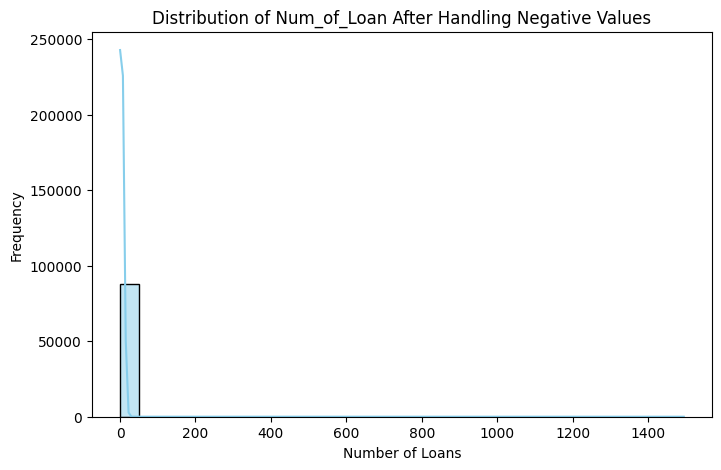

Text(0, 0.5, 'Frequency')

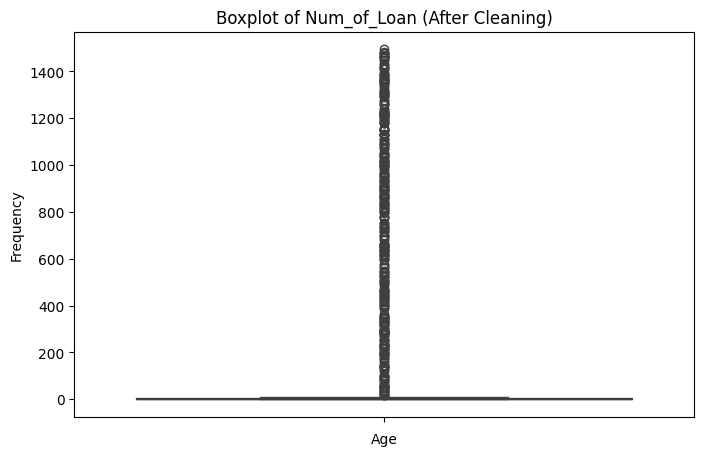

In [323]:
plt.figure(figsize=(8, 5))
sns.histplot(train_cs['Num_of_Loan'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Num_of_Loan After Handling Negative Values")
plt.xlabel("Number of Loans")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(train_cs['Num_of_Loan'])
plt.title('Boxplot of Num_of_Loan (After Cleaning)')
plt.xlabel('Age')
plt.ylabel('Frequency')

**Clipping Outliers**

In [324]:
train_cs['Num_of_Loan'] = train_cs['Num_of_Loan'].clip(lower=0, upper=9)
test_cs['Num_of_Loan'] = test_cs['Num_of_Loan'].clip(lower=0, upper=9)

In [325]:
print('Train:')
print(train_cs['Num_of_Loan'].describe())

print('_'*40)

print('Test:')
print(test_cs['Num_of_Loan'].describe())

Train:
count    88356.000000
mean         3.494998
std          2.362935
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64
________________________________________
Test:
count    44111.000000
mean         3.487996
std          2.353316
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64


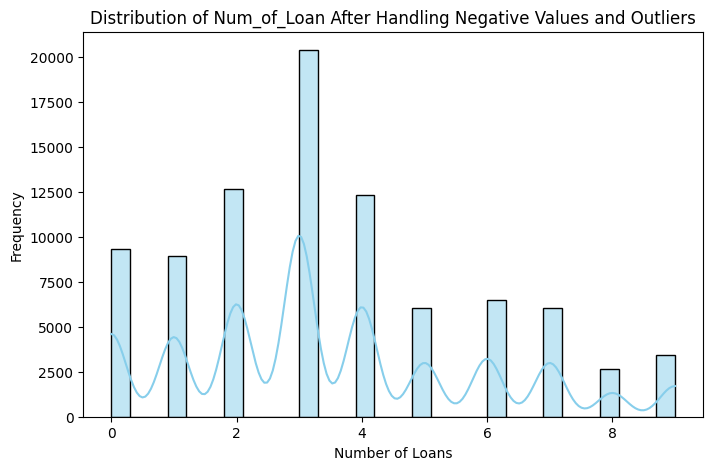

Text(0, 0.5, 'Frequency')

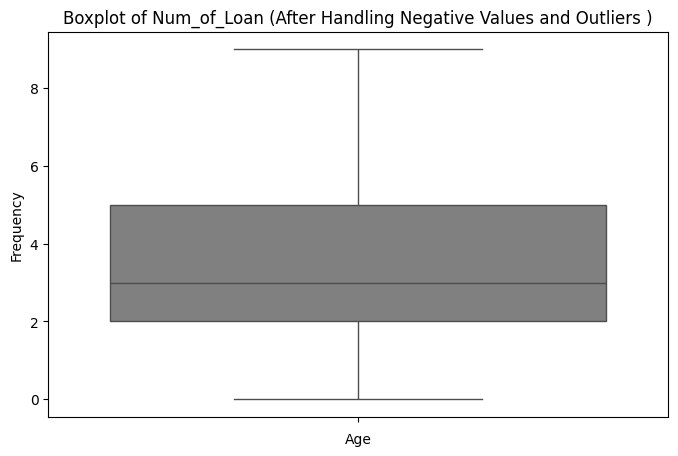

In [326]:
plt.figure(figsize=(8, 5))
sns.histplot(train_cs['Num_of_Loan'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Num_of_Loan After Handling Negative Values and Outliers")
plt.xlabel("Number of Loans")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(train_cs['Num_of_Loan'], color = 'grey')
plt.title('Boxplot of Num_of_Loan (After Handling Negative Values and Outliers )')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [327]:
train_cs['Num_of_Loan'].skew()

0.5346415495896821

### `Delay_from_due_date`

In [328]:
train_cs['Delay_from_due_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Delay_from_due_date
Non-Null Count  Dtype
--------------  -----
88356 non-null  int64
dtypes: int64(1)
memory usage: 690.4 KB


In [329]:
train_cs['Delay_from_due_date'].isnull().sum()

0

In [330]:
print('Train:')
print(train_cs['Delay_from_due_date'].describe())

print('_'*40)

print('Test:')
print(test_cs['Delay_from_due_date'].describe())

Train:
count    88356.000000
mean        21.034621
std         14.846641
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64
________________________________________
Test:
count    44111.000000
mean        20.984494
std         14.833575
min         -5.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64


* Min: -5 (a negative value, likely indicating data issues).
* Max: 67.
* Mean: ~21.
* Median (50%): 18.
* Standard Deviation: ~14.85 (indicating some spread in the values).

The negative minimum value suggests potential incorrect entries or special cases.

In [331]:
train_cs['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26, 43,
       28, 25, 20, 47, 49, 24, 61, 29, 58, 45, 27, 59, 56, 55, 57, 54, 62,
       65, 64, 67, 50, 36, 41, 33, 32, 39, 44, 46, 60, 35, 38, -3, 63, 42,
       40, 37, -5, -4, 66])

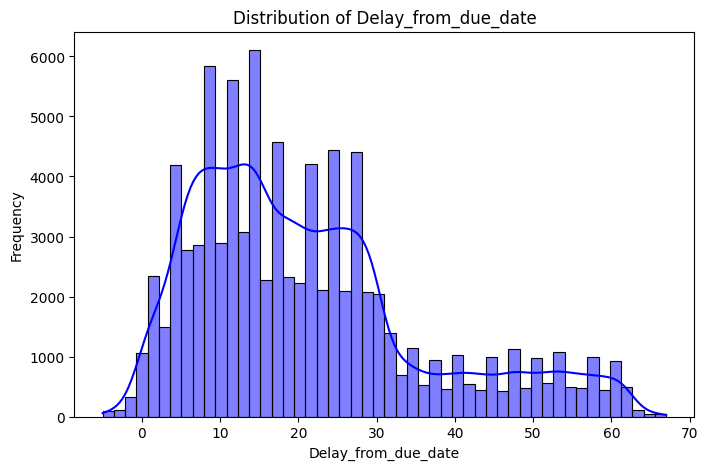

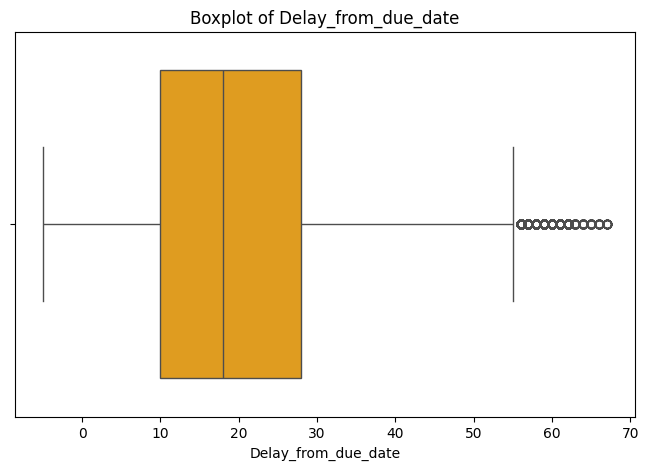

In [332]:
plt.figure(figsize=(8, 5))
sns.histplot(train_cs['Delay_from_due_date'], bins=50, kde=True, color='blue', alpha = 0.5)
plt.title("Distribution of Delay_from_due_date")
plt.xlabel("Delay_from_due_date")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize = (8,5))
sns.boxplot(train_cs['Delay_from_due_date'], color = 'orange', orient = 'h')
plt.xlabel('Delay_from_due_date')
plt.title('Boxplot of Delay_from_due_date')
plt.show()

In [333]:
train_cs['Delay_from_due_date'].value_counts()

,count
Delay_from_due_date,
15,3190
13,3068
8,2981
14,2919
10,2890
...,...
64,54
65,48
-5,30


In [334]:
train_cs['Delay_from_due_date'].skew()

0.9717370934864842

**Handlling Naegative Number(-5)**

In [335]:
train_cs[train_cs['Delay_from_due_date'] == -5]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2037,June,3.737670,Writer,10.316666,2342.356667,5.0,3.0,4.0,3.0,"Mortgage Loan, Mortgage Loan, Mortgage Loan, a...",-5,1,4.94,2.0,_,1483.59,28.783918,31 Years and 10 Months,No,98.469454,203.783750,Low_spent_Small_value_payments,221.982463,Standard
7159,March,3.784190,Developer,11.367280,7309.870000,0.0,2.0,7.0,1.0,Student Loan,-5,NaN,8.12,6.0,Good,1396.41,36.567297,NaN,NM,53.204488,146.778746,High_spent_Large_value_payments,771.003766,Good
7746,May,3.828641,Lawyer,11.794134,10889.420000,3.0,5.0,9.0,2.0,"Mortgage Loan, and Payday Loan",-5,7,_,4.0,Good,1412.35,27.722066,32 Years and 11 Months,No,119.439990,434.222718,High_spent_Medium_value_payments,785.279292,Standard
8519,March,3.737670,_______,10.461862,2809.048333,0.0,4.0,11.0,3.0,"Personal Loan, Debt Consolidation Loan, and Au...",-5,1,9.86,0.0,Good,595.8,28.708799,15 Years and 7 Months,No,59.155213,178.922494,Low_spent_Large_value_payments,312.827126,Standard
10467,May,3.135494,Doctor,11.760304,10394.203333,4.0,6.0,6.0,4.0,"Mortgage Loan, Credit-Builder Loan, Credit-Bui...",-5,8,5.38,2.0,Good,1004.44,29.490599,19 Years and 3 Months,NM,366.397466,129.749861,High_spent_Large_value_payments,783.273006,Poor
12470,August,3.135494,Scientist,10.695986,3446.512500,4.0,3.0,6.0,4.0,"Not Specified, Auto Loan, Home Equity Loan, an...",-5,1,12.08,4.0,Good,300.68,29.409098,18 Years and 0 Months,No,123.549902,307.198233,Low_spent_Large_value_payments,183.903115,Standard
17150,June,3.737670,Mechanic,11.808869,11030.283333,0.0,3.0,2.0,2.0,"Student Loan, and Auto Loan",-5,10,11.57,4.0,Good,199.96,31.521508,23 Years and 3 Months,NM,158.044048,524.347510,!@9#%8,700.636776,Standard
21253,April,3.637586,Media_Manager,9.962078,1881.235000,1.0,5.0,4.0,1.0,Credit-Builder Loan,-5,13,-2.5,4.0,Good,246.86,27.224820,25 Years and 0 Months,No,14.431146,203.608418,!@9#%8,260.083936,Good
29211,August,3.433987,Musician,10.480107,NaN,0.0,3.0,9.0,3.0,"Student Loan, Home Equity Loan, and Credit-Bui...",-5,10,6.63,4.0,Good,577.57,30.200973,32 Years and 6 Months,No,50.648600,64.902480,High_spent_Medium_value_payments,447.517253,Good
31660,July,3.951244,Architect,11.401946,7417.972500,1.0,4.0,9.0,2.0,"Student Loan, and Not Specified",-5,1,6.84,4.0,Good,1393.69,29.924685,23 Years and 3 Months,No,87.146215,783.923581,Low_spent_Small_value_payments,160.727455,Poor


In [336]:
median_delay = train_cs['Delay_from_due_date'].median()
median_delay

18.0

In [337]:
train_cs['Delay_from_due_date'] = train_cs['Delay_from_due_date'].apply(lambda x: median_delay if x < 0  else x)
test_cs['Delay_from_due_date'] = test_cs['Delay_from_due_date'].apply(lambda x: median_delay if x < 0  else x)

In [338]:
print('Train:')
print(train_cs['Delay_from_due_date'].describe())

print('_'*40)

print('Test:')
print(test_cs['Delay_from_due_date'].describe())

Train:
count    88356.000000
mean        21.154840
std         14.738988
min          0.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64
________________________________________
Test:
count    44111.000000
mean        21.106141
std         14.724543
min          0.000000
25%         10.000000
50%         18.000000
75%         28.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64


* The values do look realistic and plausible, as they follow a gradual trend and do not seem out of place or extreme compared to the rest of the distribution.
* They are spread evenly, and there's no abrupt jump or unusually high frequency at the upper end of the range
* it is logical not to treat them as outliers or cap them.

Valid Values (60-69) Untouched:

These values appear reasonable based on the distribution and should not be capped or altered.

### `Num_of_Delayed_Payment`

In [339]:
train_cs['Num_of_Delayed_Payment'] = pd.to_numeric(train_cs['Num_of_Delayed_Payment'], errors = 'coerce')
test_cs['Num_of_Delayed_Payment'] = pd.to_numeric(test_cs['Num_of_Delayed_Payment'], errors = 'coerce')

In [340]:
train_cs['Num_of_Delayed_Payment'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Num_of_Delayed_Payment
Non-Null Count  Dtype  
--------------  -----  
79750 non-null  float64
dtypes: float64(1)
memory usage: 690.4 KB


In [341]:
print('Train:')
print(train_cs['Num_of_Delayed_Payment'].describe())

print('_'*40)

print('Test:')
print(test_cs['Num_of_Delayed_Payment'].describe())

Train:
count    79750.000000
mean        30.976502
std        226.465623
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64
________________________________________
Test:
count    39805.000000
mean        30.483809
std        218.400525
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4374.000000
Name: Num_of_Delayed_Payment, dtype: float64


* Mean: 30.98
* Median (50th Percentile): 14.0
* Range: Min = -3, Max = 4397 (a huge spread!)
* Standard Deviation: 226.47, indicating very high variability.

In [342]:
print('Percentage of Missing Value in Train:',train_cs['Num_of_Delayed_Payment'].isnull().sum() / len(train_cs['Num_of_Delayed_Payment'] * 100))
print('Percentage of Missing Value in Test:',test_cs['Num_of_Delayed_Payment'].isnull().sum() / len(test_cs['Num_of_Delayed_Payment'] * 100))

Percentage of Missing Value in Train: 0.09740142152202454
Percentage of Missing Value in Test: 0.09761737435106889


Train: ~0.097% missing values is negligible and can be imputed easily.

Test: ~0.96% is slightly higher but manageable.

* Negative Values: A negative number of delayed payments (-3) is invalid and must be addressed.
* Extreme Outliers: The maximum value (4397) seems unrealistic. It likely needs capping or winzorization to handle outliers.

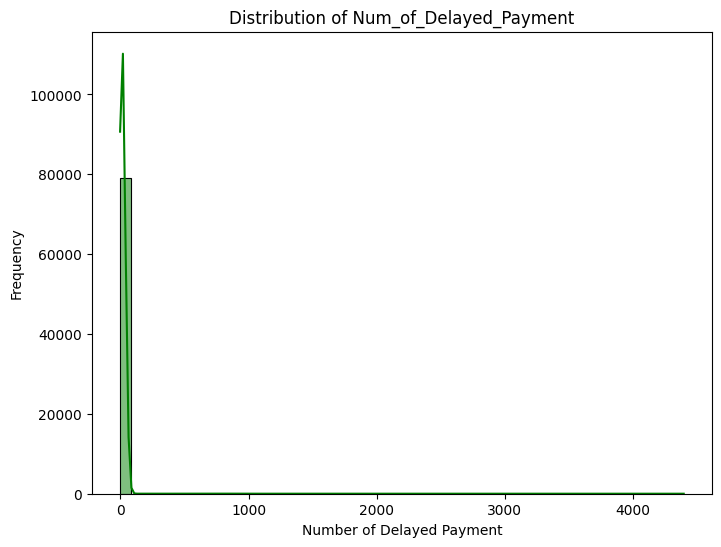

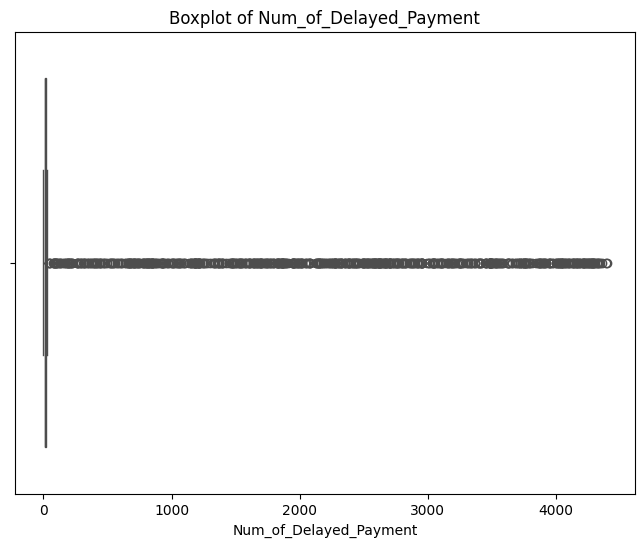

In [343]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Num_of_Delayed_Payment'], bins=50, kde=True, color='green', alpha = 0.5)
plt.title("Distribution of Num_of_Delayed_Payment")
plt.xlabel("Number of Delayed Payment")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Num_of_Delayed_Payment'], color='orange')
plt.title("Boxplot of Num_of_Delayed_Payment")
plt.show()

In [344]:
train_cs['Num_of_Delayed_Payment'].value_counts()

,count
Num_of_Delayed_Payment,
19.0,4668
17.0,4600
16.0,4596
10.0,4559
15.0,4523
...,...
2587.0,1
1869.0,1
1685.0,1


**Handling Negative Values**

In [345]:
train_cs[train_cs['Num_of_Delayed_Payment'] == -3]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1102,June,3.891820,Doctor,16.560248,NaN,0.0,4.0,4.0,0.0,NaN,1.0,-3.0,1.38,4.0,Good,1287.59,30.801079,25 Years and 7 Months,NM,0.000000,97.705452,Low_spent_Small_value_payments,319.668590,Standard
2561,June,3.988984,Lawyer,10.662686,3300.939167,0.0,4.0,1.0,2.0,"Mortgage Loan, and Home Equity Loan",9.0,-3.0,10.2,1.0,Good,511.85,31.143737,24 Years and 6 Months,No,50.851014,148.131710,High_spent_Small_value_payments,391.111193,Standard
3082,April,3.091042,Musician,11.324669,6973.353333,1.0,6.0,1.0,1.0,Not Specified,8.0,-3.0,1.81,1.0,Good,360.92,31.584460,18 Years and 8 Months,No,56.691938,257.584528,High_spent_Medium_value_payments,633.058867,Poor
3680,June,3.555348,Architect,10.595251,3318.722500,4.0,3.0,7.0,1.0,Personal Loan,0.0,-3.0,13.34,1.0,Good,364.95,24.331350,16 Years and 2 Months,No,22.377777,91.359578,High_spent_Medium_value_payments,468.134895,Good
3724,April,3.912023,Journalist,11.852182,11888.193333,5.0,2.0,4.0,3.0,"Credit-Builder Loan, Home Equity Loan, and Pay...",1.0,-3.0,4.67,6.0,Good,1423.23,43.356235,30 Years and 11 Months,No,182.160424,183.542042,High_spent_Medium_value_payments,1073.116868,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77320,February,3.828641,Teacher,9.783442,NaN,4.0,7.0,8.0,0.0,NaN,6.0,-3.0,6.2,7.0,_,1420.93,35.406488,25 Years and 11 Months,No,0.000000,29.168723,High_spent_Small_value_payments,356.844610,Good
77324,June,3.828641,_______,9.783442,1260.133333,4.0,7.0,8.0,0.0,NaN,6.0,-3.0,6.2,7.0,Good,1420.93,40.433808,26 Years and 3 Months,No,0.000000,105.811999,Low_spent_Small_value_payments,310.201334,Good
82190,August,3.988984,_______,11.633843,9552.435000,2.0,4.0,4.0,2.0,"Student Loan, and Debt Consolidation Loan",3.0,-3.0,8.06,0.0,Good,732.33,30.009131,17 Years and 5 Months,NM,127.072288,314.482275,High_spent_Medium_value_payments,763.688938,Standard
82674,May,3.610918,Entrepreneur,11.304287,6950.070000,2.0,3.0,2.0,3.0,"Debt Consolidation Loan, Auto Loan, and Studen...",29.0,-3.0,7.14,1.0,Good,1367.13,36.728934,21 Years and 9 Months,No,184.809017,81.129509,!@9#%8,679.068474,Poor


In [346]:
median_delay = train_cs['Num_of_Delayed_Payment'].median()

In [347]:
train_cs['Num_of_Delayed_Payment'] = train_cs['Num_of_Delayed_Payment'].apply(lambda x: median_delay if x < 0 else x)
test_cs['Num_of_Delayed_Payment'] = test_cs['Num_of_Delayed_Payment'].apply(lambda x: median_delay if x < 0 else x)

**Handling Missing Values**

In [348]:
median_value = train_cs['Num_of_Delayed_Payment'].median()

train_cs['Num_of_Delayed_Payment'].fillna(median_value, inplace=True)
test_cs['Num_of_Delayed_Payment'].fillna(median_value, inplace=True)

<ipython-input-348-fe7984966c2a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_cs['Num_of_Delayed_Payment'].fillna(median_value, inplace=True)
<ipython-input-348-fe7984966c2a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

**Handling Outliers**

In [349]:
q99 = train_cs['Num_of_Delayed_Payment'].quantile(0.99)
print('99 Percentile:', q99)

train_cs['Num_of_Delayed_Payment'] = train_cs['Num_of_Delayed_Payment'].apply(lambda x: min(x, q99))
test_cs['Num_of_Delayed_Payment'] = test_cs['Num_of_Delayed_Payment'].apply(lambda x: min(x, q99))

99 Percentile: 27.0


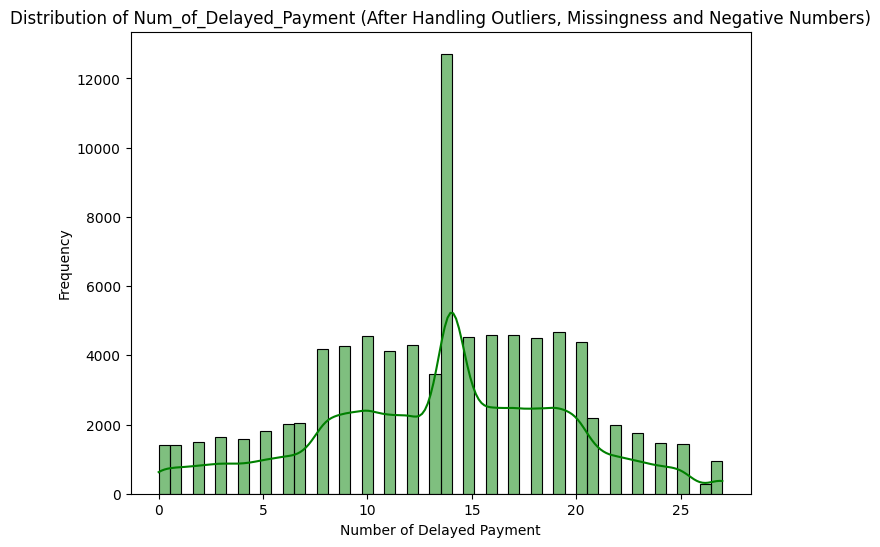

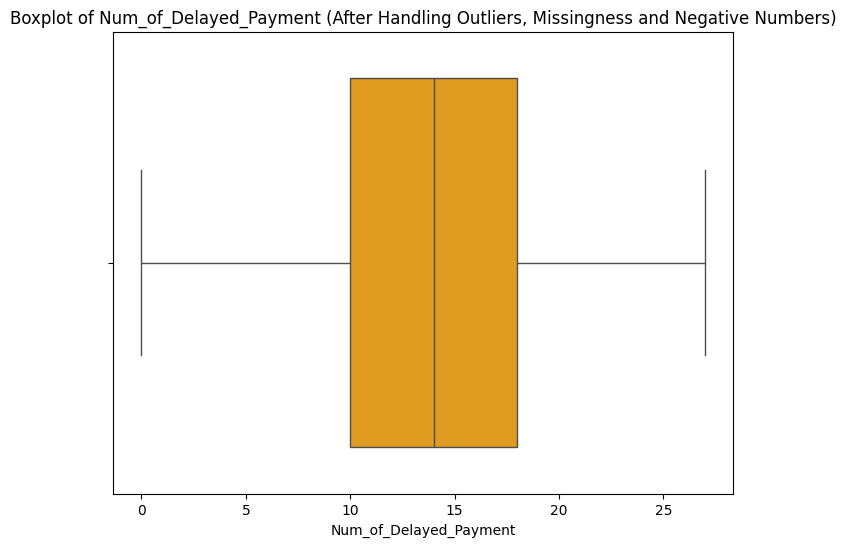

In [350]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Num_of_Delayed_Payment'], bins=50, kde=True, color='green', alpha = 0.5)
plt.title("Distribution of Num_of_Delayed_Payment (After Handling Outliers, Missingness and Negative Numbers)")
plt.xlabel("Number of Delayed Payment")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Num_of_Delayed_Payment'], color='orange')
plt.title("Boxplot of Num_of_Delayed_Payment (After Handling Outliers, Missingness and Negative Numbers)")
plt.show()

In [351]:
train_cs['Num_of_Delayed_Payment'].skew()

-0.17361914379360496

In [352]:
print('Train:')
print(train_cs['Num_of_Delayed_Payment'].describe())

print('_'*40)

print('Test:')
print(test_cs['Num_of_Delayed_Payment'].describe())

Train:
count    88356.000000
mean        13.580594
std          5.961035
min          0.000000
25%         10.000000
50%         14.000000
75%         18.000000
max         27.000000
Name: Num_of_Delayed_Payment, dtype: float64
________________________________________
Test:
count    44111.000000
mean        13.560540
std          5.970121
min          0.000000
25%         10.000000
50%         14.000000
75%         18.000000
max         27.000000
Name: Num_of_Delayed_Payment, dtype: float64


* The skewness of the column was reduced to -0.182, indicating a near-normal distribution.
* To handle extreme values (outliers) in the `Num_of_Delayed_Payment` column by capping them at the 99th percentile, reducing skewness and making the data more suitable for modeling.
* The apply function ensures that all values greater than q99 are replaced with q99.



### `Changed_Credit_Limit`

In [353]:
train_cs['Changed_Credit_Limit'] = pd.to_numeric(train_cs['Changed_Credit_Limit'], errors = 'coerce')
test_cs['Changed_Credit_Limit'] = pd.to_numeric(test_cs['Changed_Credit_Limit'], errors = 'coerce')

In [354]:
train_cs['Changed_Credit_Limit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Changed_Credit_Limit
Non-Null Count  Dtype  
--------------  -----  
86510 non-null  float64
dtypes: float64(1)
memory usage: 690.4 KB


In [355]:
print('Percentage of missing values in Train:', train_cs['Changed_Credit_Limit'].isnull().sum() / len(train_cs['Changed_Credit_Limit'])*100)
print('Percentage of missing values in Test:', test_cs['Changed_Credit_Limit'].isnull().sum() / len(test_cs['Changed_Credit_Limit'])*100)

Percentage of missing values in Train: 2.0892752048530943
Percentage of missing values in Test: 2.142322776631679


In [356]:
print('Train:')
print(train_cs['Changed_Credit_Limit'].describe())

print('_'*40)

print('Test:')
print(test_cs['Changed_Credit_Limit'].describe())

Train:
count    86510.000000
mean        10.388997
std          6.773739
min         -6.490000
25%          5.350000
50%          9.400000
75%         14.840000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64
________________________________________
Test:
count    43166.000000
mean        10.350693
std          6.763179
min         -6.450000
25%          5.310000
50%          9.400000
75%         14.760000
max         36.650000
Name: Changed_Credit_Limit, dtype: float64


In [357]:
train_cs['Changed_Credit_Limit'].value_counts().head(15)

,count
Changed_Credit_Limit,
8.22,119
11.50,118
11.32,114
10.06,109
7.35,107
11.49,102
8.23,101
7.33,98
1.63,96


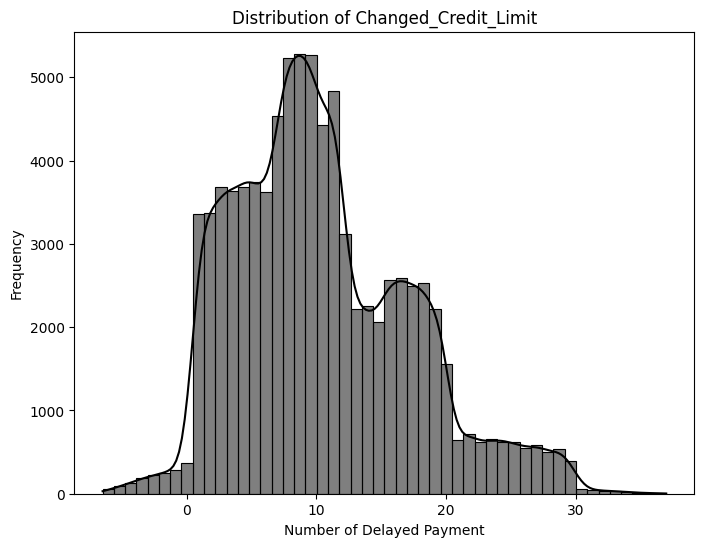

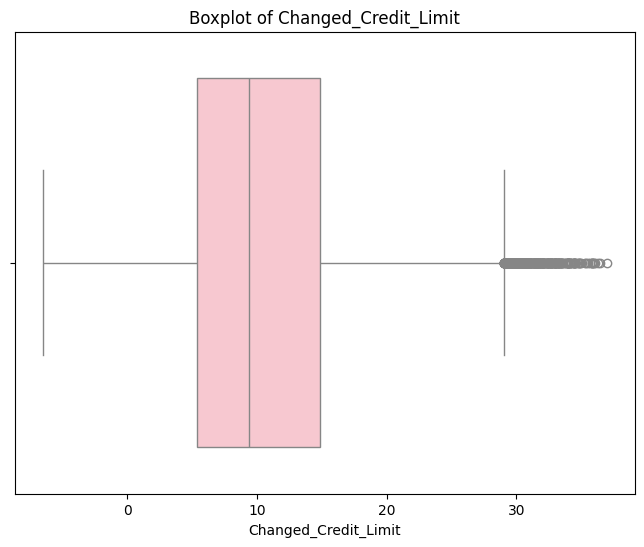

In [358]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Changed_Credit_Limit'], bins=50, kde=True, color='black', alpha = 0.5)
plt.title("Distribution of Changed_Credit_Limit")
plt.xlabel("Number of Delayed Payment")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Changed_Credit_Limit'], color='pink')
plt.title("Boxplot of Changed_Credit_Limit")
plt.show()

In [359]:
train_cs['Changed_Credit_Limit'].skew()

0.6412944693337397

In [360]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
train_cs['Changed_Credit_Limit'] = imputer.fit_transform(train_cs[['Changed_Credit_Limit']])
test_cs['Changed_Credit_Limit'] = imputer.transform(test_cs[['Changed_Credit_Limit']])

In [361]:
mean_value = train_cs['Changed_Credit_Limit'].mean()
train_cs['Changed_Credit_Limit'] = train_cs['Changed_Credit_Limit'].apply(lambda x: mean_value if x < 0 else x)
test_cs['Changed_Credit_Limit'] = test_cs['Changed_Credit_Limit'].apply(lambda x: mean_value if x < 0 else x)

**Handling Negative Nummber**

In [362]:
train_cs[train_cs['Changed_Credit_Limit'] == -6]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [363]:
print('Train:')
print(train_cs['Changed_Credit_Limit'].describe())

print('_'*40)

print('Test:')
print(test_cs['Changed_Credit_Limit'].describe())

Train:
count    88356.000000
mean        10.587617
std          6.504760
min          0.000000
25%          5.760000
50%          9.780000
75%         14.650000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64
________________________________________
Test:
count    44111.000000
mean        10.563765
std          6.477877
min          0.000000
25%          5.770000
50%          9.790000
75%         14.560000
max         36.650000
Name: Changed_Credit_Limit, dtype: float64


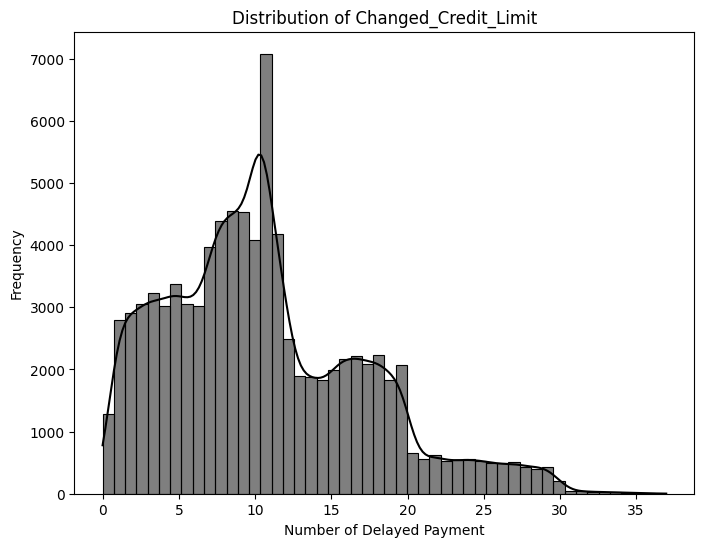

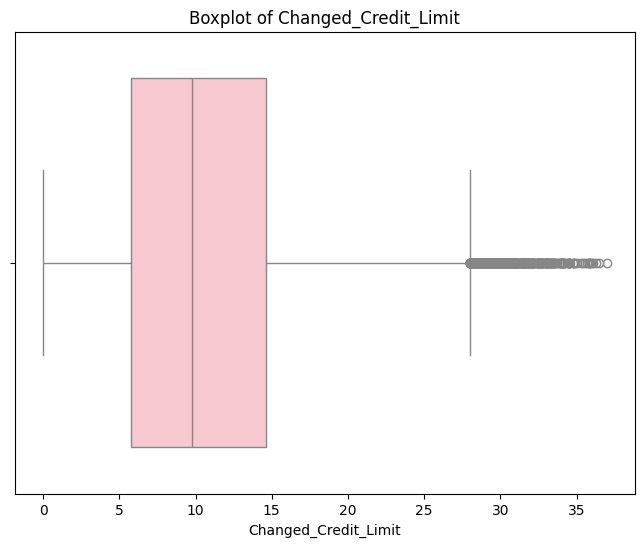

In [364]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Changed_Credit_Limit'], bins=50, kde=True, color='black', alpha = 0.5)
plt.title("Distribution of Changed_Credit_Limit")
plt.xlabel("Number of Delayed Payment")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Changed_Credit_Limit'], color='pink')
plt.title("Boxplot of Changed_Credit_Limit")
plt.show()

In [365]:
train_cs['Changed_Credit_Limit'].skew()

0.740629984229554

A skewness of 0.74 indicates a moderately right-skewed distribution, but it's not extreme.

### `Num_Credit_Inquiries`

In [366]:
train_cs['Num_Credit_Inquiries'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Num_Credit_Inquiries
Non-Null Count  Dtype  
--------------  -----  
88356 non-null  float64
dtypes: float64(1)
memory usage: 690.4 KB


In [367]:
print('Percentage of missing values in Train:', train_cs['Num_Credit_Inquiries'].isnull().sum() / len(train_cs['Num_Credit_Inquiries'])*100)
print('Percentage of missing values in Test:', test_cs['Num_Credit_Inquiries'].isnull().sum() / len(test_cs['Num_Credit_Inquiries'])*100)

Percentage of missing values in Train: 0.0
Percentage of missing values in Test: 0.0


In [368]:
print('Train:')
print(train_cs['Num_Credit_Inquiries'].describe())

print('_'*40)

print('Test:')
print(test_cs['Num_Credit_Inquiries'].describe())

Train:
count    88356.000000
mean        27.611685
std        192.898831
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64
________________________________________
Test:
count    44111.000000
mean        30.370044
std        198.690634
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max       2593.000000
Name: Num_Credit_Inquiries, dtype: float64


In [369]:
train_cs['Num_Credit_Inquiries'].value_counts()

,count
Num_Credit_Inquiries,
4.0,10174
3.0,8035
6.0,7342
2.0,7255
7.0,7220
...,...
2580.0,1
287.0,1
273.0,1


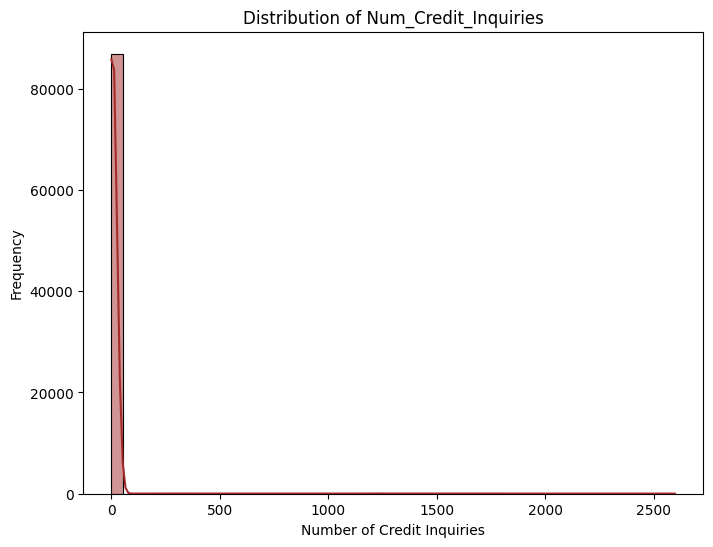

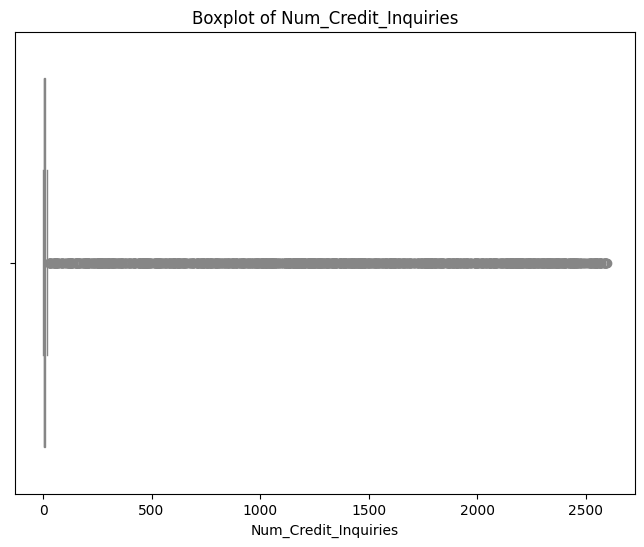

In [370]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Num_Credit_Inquiries'], bins=50, kde=True, color='brown', alpha = 0.5)
plt.title("Distribution of Num_Credit_Inquiries")
plt.xlabel("Number of Credit Inquiries")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Num_Credit_Inquiries'], color='pink')
plt.title("Boxplot of Num_Credit_Inquiries")
plt.show()

In [371]:
Q1 = train_cs['Num_Credit_Inquiries'].quantile(0.25)
Q3 = train_cs['Num_Credit_Inquiries'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -6.0, Upper Bound: 18.0


In [372]:
q95 = train_cs['Num_Credit_Inquiries'].quantile(0.95)
print(f"95th Percentile: {q95}")

train_cs['Num_Credit_Inquiries'] = train_cs['Num_Credit_Inquiries'].apply(lambda x: min(x, q95))
test_cs['Num_Credit_Inquiries'] = test_cs['Num_Credit_Inquiries'].apply(lambda x: min(x, q95))

95th Percentile: 13.0


The large jump between the 95th and 99th percentiles indicates that values beyond the 95th percentile might represent extreme outliers. Capping at the 95th percentile ensures a realistic approach while minimizing the distortion of data.

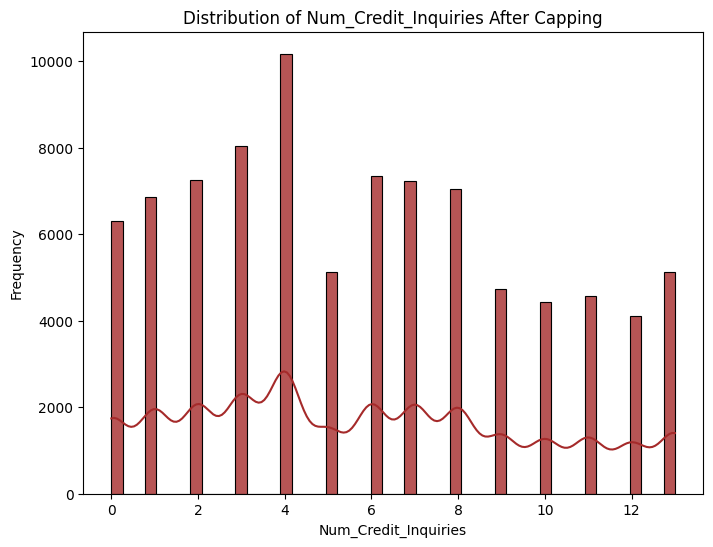

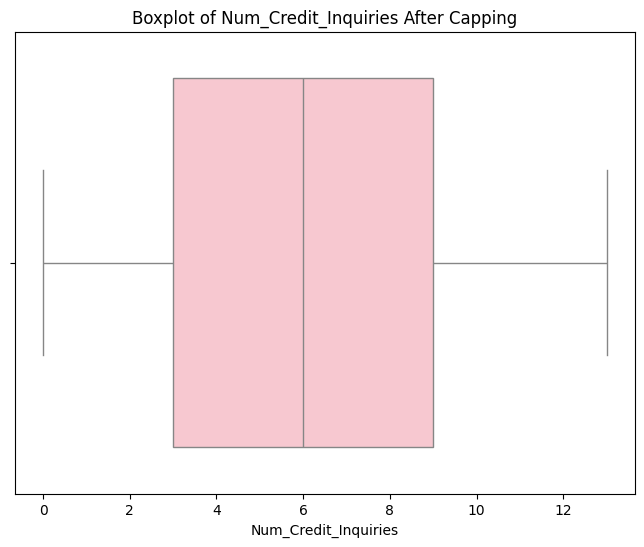

In [373]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Num_Credit_Inquiries'], bins=50, kde=True, color='brown', alpha = 0.8)
plt.title("Distribution of Num_Credit_Inquiries After Capping")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Num_Credit_Inquiries'], color='pink')
plt.title("Boxplot of Num_Credit_Inquiries After Capping")
plt.show()

In [374]:
train_cs['Num_Credit_Inquiries'].skew()

0.26777766033647676

In [375]:
print('Train:')
print(train_cs['Num_Credit_Inquiries'].describe())

print('_'*40)

print('Test:')
print(test_cs['Num_Credit_Inquiries'].describe())

Train:
count    88356.000000
mean         5.840928
std          3.826086
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         13.000000
Name: Num_Credit_Inquiries, dtype: float64
________________________________________
Test:
count    44111.000000
mean         7.228673
std          3.732365
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         13.000000
Name: Num_Credit_Inquiries, dtype: float64


### `Outstanding_Debt`

In [376]:
train_cs['Outstanding_Debt'] = pd.to_numeric(train_cs['Outstanding_Debt'], errors = 'coerce')
test_cs['Outstanding_Debt'] = pd.to_numeric(test_cs['Outstanding_Debt'], errors = 'coerce')

In [377]:
train_cs['Outstanding_Debt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Outstanding_Debt
Non-Null Count  Dtype  
--------------  -----  
87463 non-null  float64
dtypes: float64(1)
memory usage: 690.4 KB


In [378]:
print('Percentage of missing values in Train:', train_cs['Outstanding_Debt'].isnull().sum() / len(train_cs['Outstanding_Debt'])*100)
print('Percentage of missing values in Test:', test_cs['Outstanding_Debt'].isnull().sum() / len(test_cs['Outstanding_Debt'])*100)

Percentage of missing values in Train: 1.0106840508850559
Percentage of missing values in Test: 0.974813538573145


In [379]:
print('Train:')
print(train_cs['Outstanding_Debt'].describe())

print('_'*40)

print('Test:')
print(test_cs['Outstanding_Debt'].describe())

Train:
count    87463.000000
mean      1422.964411
std       1151.546561
min          0.230000
25%        566.340000
50%       1163.930000
75%       1938.260000
max       4998.070000
Name: Outstanding_Debt, dtype: float64
________________________________________
Test:
count    43681.000000
mean      1419.132031
std       1150.032469
min          0.230000
25%        563.840000
50%       1162.520000
75%       1932.490000
max       4998.070000
Name: Outstanding_Debt, dtype: float64


"Outstanding_Debt" can be zero, meaning someone or a company owes no money on any loans or credit lines, effectively having no debt at all; this is considered a "debt-free" status

In [380]:
train_cs['Outstanding_Debt'].value_counts()

,count
Outstanding_Debt,
1151.70,21
1109.03,20
460.46,20
1360.45,19
1854.48,16
...,...
3373.85,3
1187.67,3
105.66,3


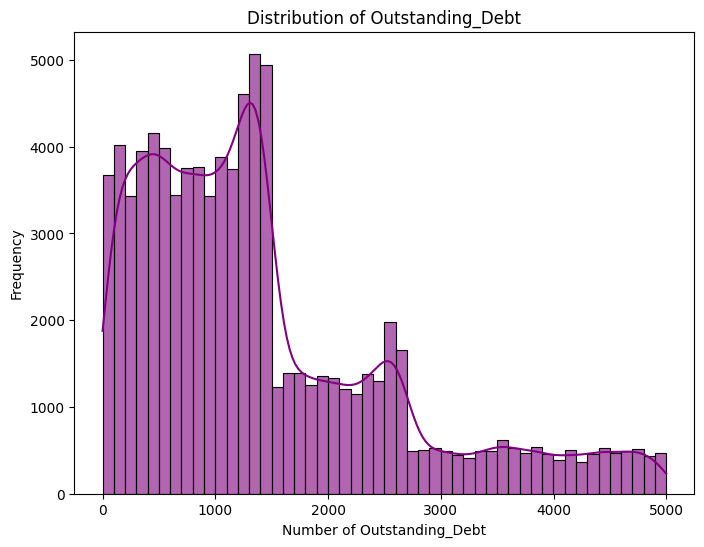

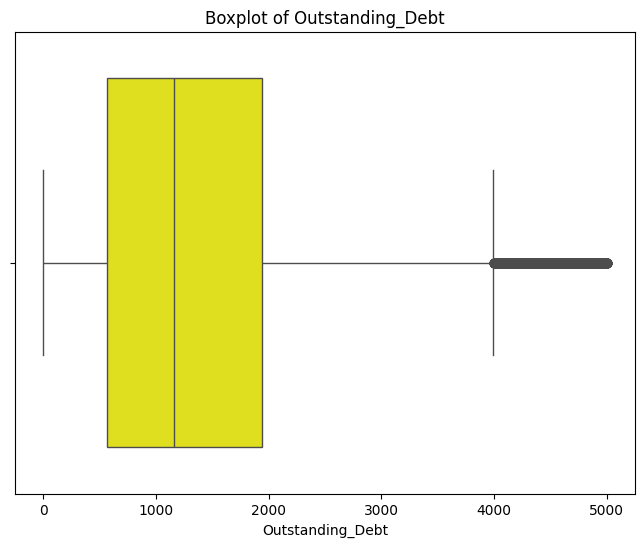

In [381]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Outstanding_Debt'], bins=50, kde=True, color='purple', alpha = 0.6)
plt.title("Distribution of Outstanding_Debt")
plt.xlabel("Number of Outstanding_Debt")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Outstanding_Debt'], color='yellow')
plt.title("Boxplot of Outstanding_Debt")
plt.show()

In [382]:
train_cs['Outstanding_Debt'].skew()

1.211978326681928

In [383]:
train_cs['Outstanding_Debt'].value_counts().sort_values().head(15)

,count
Outstanding_Debt,
1311.00,3
394.22,3
4779.36,3
1262.52,3
418.24,3
285.59,3
1244.79,3
4667.33,3
469.39,3


* There are case that Outstanding Debt are more than 5000
* we should not cap or treat these values as outliers.

**Imputing Missing Values**

In [384]:
# Create the SimpleImputer object with median strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to both train and test datasets
train_cs['Outstanding_Debt'] = imputer.fit_transform(train_cs[['Outstanding_Debt']])
test_cs['Outstanding_Debt'] = imputer.transform(test_cs[['Outstanding_Debt']])

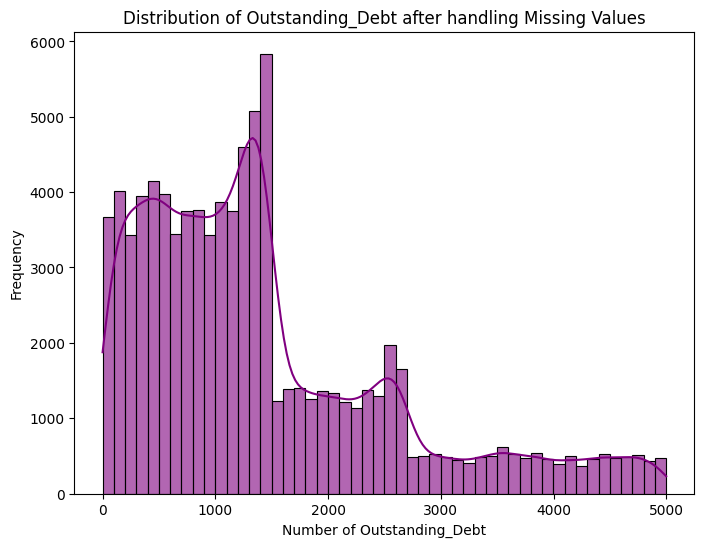

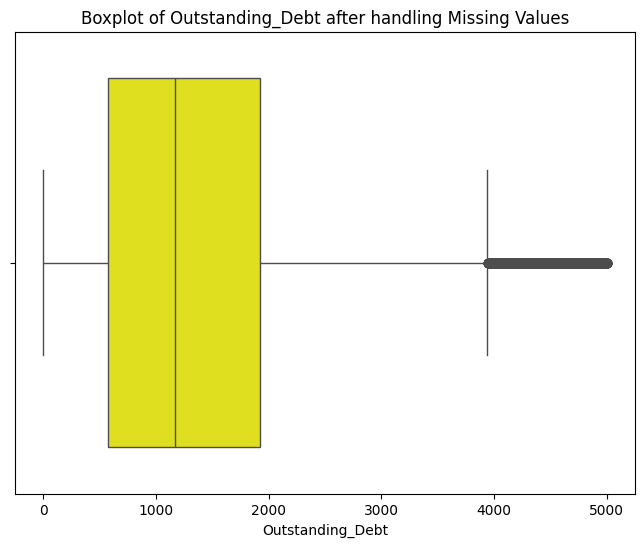

In [385]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Outstanding_Debt'], bins=50, kde=True, color='purple', alpha = 0.6)
plt.title("Distribution of Outstanding_Debt after handling Missing Values")
plt.xlabel("Number of Outstanding_Debt")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Outstanding_Debt'], color='yellow')
plt.title("Boxplot of Outstanding_Debt after handling Missing Values")
plt.show()

In [386]:
train_cs['Outstanding_Debt'].skew()

1.2181495713949286

* No Capping: Since extreme values are valid, do not cap outliers.
* Imputation Strategy: Use mean for missing values.

### `Credit_Utilization_Ratio`

In [387]:
train_cs['Credit_Utilization_Ratio'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Credit_Utilization_Ratio
Non-Null Count  Dtype  
--------------  -----  
88356 non-null  float64
dtypes: float64(1)
memory usage: 690.4 KB


In [388]:
print('Percentage of missing values in Train:', train_cs['Credit_Utilization_Ratio'].isnull().sum() / len(train_cs['Credit_Utilization_Ratio'])*100)
print('Percentage of missing values in Test:', test_cs['Credit_Utilization_Ratio'].isnull().sum() / len(test_cs['Credit_Utilization_Ratio'])*100)

Percentage of missing values in Train: 0.0
Percentage of missing values in Test: 0.0


In [389]:
print('Train:')
print(train_cs['Credit_Utilization_Ratio'].describe())

print('_'*40)

print('Test:')
print(test_cs['Credit_Utilization_Ratio'].describe())

Train:
count    88356.000000
mean        32.299368
std          5.108643
min         20.881250
25%         28.067096
50%         32.321080
75%         36.508921
max         50.000000
Name: Credit_Utilization_Ratio, dtype: float64
________________________________________
Test:
count    44111.000000
mean        32.311697
std          5.099591
min         20.800587
25%         28.113969
50%         32.304656
75%         36.489503
max         48.540663
Name: Credit_Utilization_Ratio, dtype: float64


In [390]:
train_cs['Credit_Utilization_Ratio']

,Credit_Utilization_Ratio
0,26.822620
1,31.944960
2,28.609352
3,31.377862
4,24.797347
...,...
88351,34.663572
88352,40.565631
88353,41.255522
88354,33.638208


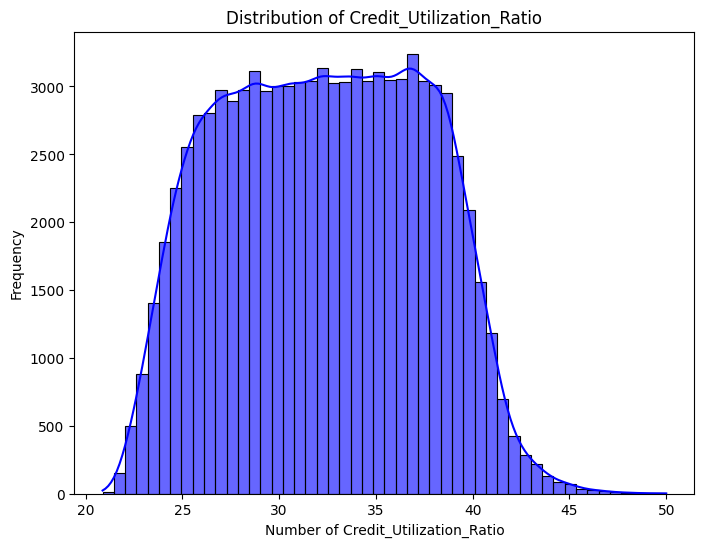

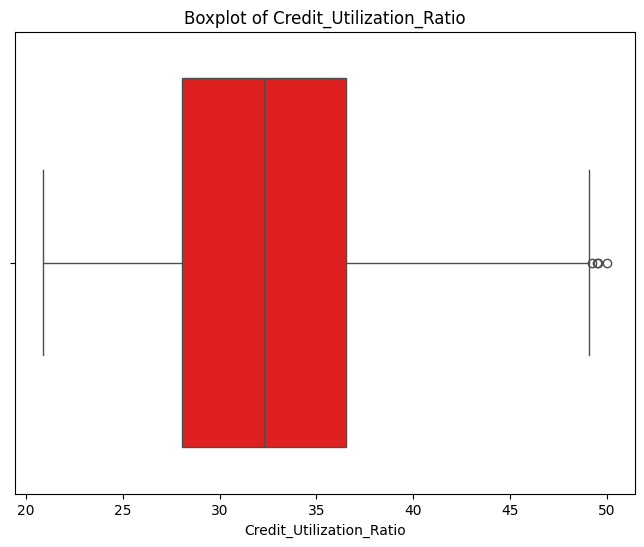

In [391]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Credit_Utilization_Ratio'], bins=50, kde=True, color='blue', alpha = 0.6)
plt.title("Distribution of Credit_Utilization_Ratio")
plt.xlabel("Number of Credit_Utilization_Ratio")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Credit_Utilization_Ratio'], color='red')
plt.title("Boxplot of Credit_Utilization_Ratio")
plt.show()

In [392]:
train_cs['Credit_Utilization_Ratio'].skew()

0.03164367172776664

he Credit_Utilization_Ratio column appears to be well-distributed with the following characteristics:

* Skewness:

  * The skewness is 0.03, indicating that the distribution is nearly symmetric.
* No Missing Values:

  * No imputation is required.
* Distribution:

  * The histogram indicates a relatively normal distribution with no extreme outliers.
* Summary Statistics:

  * The min, max, and quartiles are all within a reasonable range.

### `Total_EMI_per_month`

In [393]:
train_cs['Total_EMI_per_month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Total_EMI_per_month
Non-Null Count  Dtype  
--------------  -----  
88356 non-null  float64
dtypes: float64(1)
memory usage: 690.4 KB


In [394]:
print('Percentage of missing values in Train:', train_cs['Total_EMI_per_month'].isnull().sum() / len(train_cs['Total_EMI_per_month'])*100)
print('Percentage of missing values in Test:', test_cs['Total_EMI_per_month'].isnull().sum() / len(test_cs['Total_EMI_per_month'])*100)

Percentage of missing values in Train: 0.0
Percentage of missing values in Test: 0.0


In [395]:
print('Train:')
print(train_cs['Total_EMI_per_month'].describe())

print('_'*40)

print('Test:')
print(test_cs['Total_EMI_per_month'].describe())

Train:
count    88356.000000
mean      1407.407967
std       8322.103231
min          0.000000
25%         29.921581
50%         68.142341
75%        155.779989
max      82331.000000
Name: Total_EMI_per_month, dtype: float64
________________________________________
Test:
count    44111.000000
mean      1507.683011
std       8664.571418
min          0.000000
25%         31.910854
50%         73.973587
75%        171.998736
max      82398.000000
Name: Total_EMI_per_month, dtype: float64


* Mean: 1407.41, much higher than the median (68.14), confirming the skewness.
* Std: 8322.10, indicating a wide spread in the data.
* Min: 0.00 (valid as EMI can be zero for some customers).
* Max: 82331.00, which seems like an extreme outlier compared to the 75th percentile (155.78).

In [396]:
train_cs['Total_EMI_per_month'].value_counts()

,count
Total_EMI_per_month,
0.000000,9508
49.574949,8
53.928457,8
66.506180,8
86.219908,8
...,...
39038.000000,1
66817.000000,1
64122.000000,1


In [397]:
train_cs['Total_EMI_per_month'].value_counts().sort_values(ascending = True).head(20)

,count
Total_EMI_per_month,
58638.000000,1
67469.000000,1
42771.000000,1
55575.000000,1
25530.000000,1
52669.000000,1
3721.000000,1
36295.000000,1
22060.000000,1


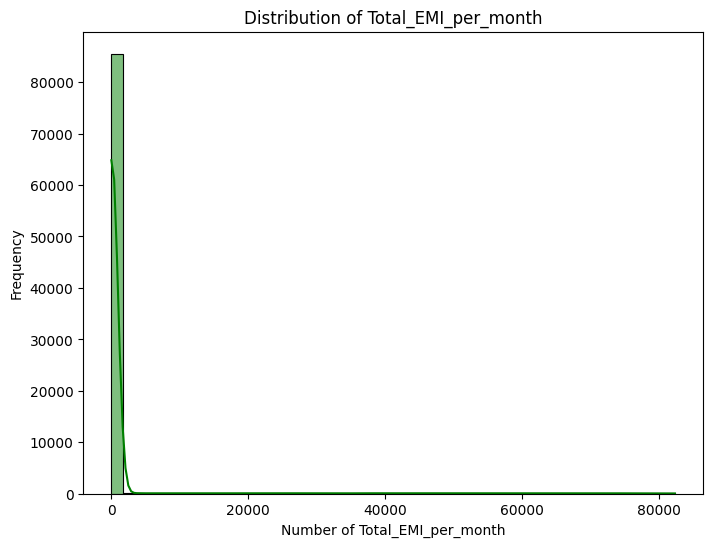

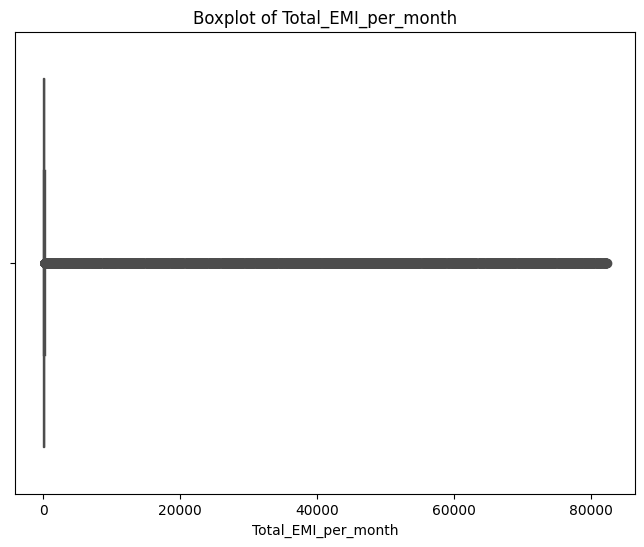

In [398]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Total_EMI_per_month'], bins=50, kde=True, color='green', alpha = 0.5)
plt.title("Distribution of Total_EMI_per_month")
plt.xlabel("Number of Total_EMI_per_month")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Total_EMI_per_month'], color='red')
plt.title("Boxplot of Total_EMI_per_month")
plt.show()

In [399]:
train_cs['Total_EMI_per_month'].skew()

7.071395952337995

**Total_EMI_per_month:**
- Skewness: 7 (highly skewed).
- Distribution: Heavily skewed with extreme outliers (see attached visualization).
- Missing Values: None.
- Domain Knowledge: Unavailable to justify handling extreme values.
- Decision: **Column left unchanged** to avoid arbitrary preprocessing and ensure we retain any potential signal from extreme values.


###`Amount_invested_monthly`

In [400]:
train_cs['Amount_invested_monthly'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Amount_invested_monthly
Non-Null Count  Dtype  
--------------  -----  
88356 non-null  float64
dtypes: float64(1)
memory usage: 690.4 KB


In [401]:
print('Percentage of missing values in Train:', train_cs['Amount_invested_monthly'].isnull().sum() / len(train_cs['Amount_invested_monthly'])*100)
print('Percentage of missing values in Test:', test_cs['Amount_invested_monthly'].isnull().sum() / len(test_cs['Amount_invested_monthly'])*100)

Percentage of missing values in Train: 0.0
Percentage of missing values in Test: 0.0


In [402]:
print('Train:')
print(train_cs['Amount_invested_monthly'].describe())

print('_'*40)

print('Test:')
print(test_cs['Amount_invested_monthly'].describe())

Train:
count    88356.000000
mean       187.550210
std        182.818667
min          0.000000
25%         71.672831
50%        127.387884
75%        230.580836
max       1646.388176
Name: Amount_invested_monthly, dtype: float64
________________________________________
Test:
count    44111.000000
mean       187.616062
std        182.524576
min          0.000000
25%         71.692081
50%        127.720759
75%        231.002818
max       1539.635702
Name: Amount_invested_monthly, dtype: float64


In [403]:
train_cs['Amount_invested_monthly'].value_counts()

,count
Amount_invested_monthly,
0.000000,168
80.415295,1
108.036088,1
51.802287,1
196.197763,1
...,...
15.053286,1
159.345508,1
87.705010,1


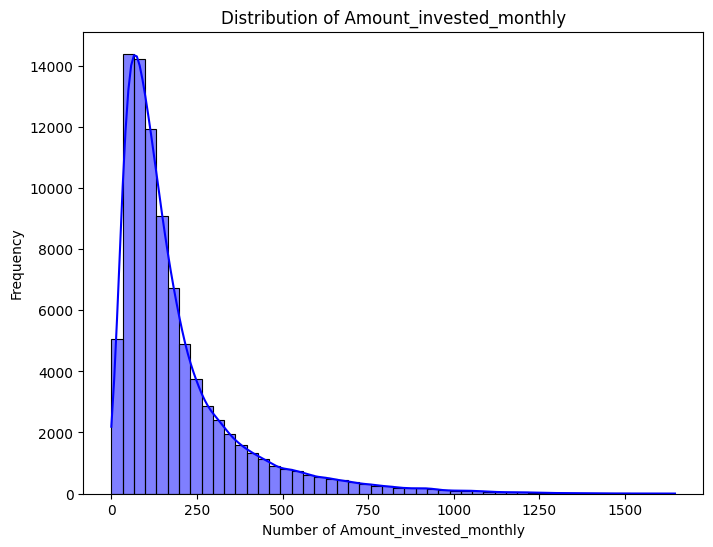

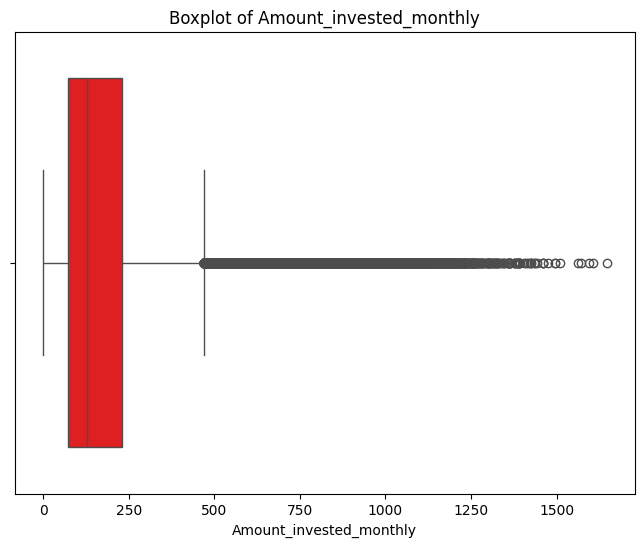

In [404]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Amount_invested_monthly'], bins=50, kde=True, color='blue', alpha = 0.5)
plt.title("Distribution of Amount_invested_monthly")
plt.xlabel("Number of Amount_invested_monthly")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Amount_invested_monthly'], color='red')
plt.title("Boxplot of Amount_invested_monthly")
plt.show()

`Amount_invested_monthly`
* Type: Continuous
* Count: 88,356 rows
* Unique Values: 88,189 unique values
* Summary Statistics:
* Mean: 187.55
* Median (50%): 127.39
* Standard Deviation: 182.82
* Minimum: 0.00
* Maximum: 1646.39
* Zeros: 168 rows (0.19% of total rows)

The Amount_invested_monthly column will be left untouched to preserve its natural characteristics and avoid introducing unnecessary assumptions. Any preprocessing (e.g., transformations, imputation) would require domain-specific insights.

###`Monthly_Balance`

In [405]:
train_cs['Monthly_Balance'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 88356 entries, 0 to 88355
Series name: Monthly_Balance
Non-Null Count  Dtype  
--------------  -----  
88356 non-null  float64
dtypes: float64(1)
memory usage: 690.4 KB


In [406]:
print('Percentage of missing values in Train:', train_cs['Monthly_Balance'].isnull().sum() / len(train_cs['Monthly_Balance'])*100)
print('Percentage of missing values in Test:', test_cs['Monthly_Balance'].isnull().sum() / len(test_cs['Monthly_Balance'])*100)

Percentage of missing values in Train: 0.0
Percentage of missing values in Test: 0.0


In [407]:
print('Train:')
print(train_cs['Monthly_Balance'].describe())

print('_'*40)

print('Test:')
print(test_cs['Monthly_Balance'].describe())

Train:
count    88356.000000
mean       402.304896
std        213.576688
min          0.095482
25%        270.066552
50%        336.673665
75%        469.630098
max       1576.288935
Name: Monthly_Balance, dtype: float64
________________________________________
Test:
count    44111.000000
mean       403.108393
std        213.775104
min          0.103402
25%        270.539727
50%        337.134000
75%        470.860226
max       1606.518192
Name: Monthly_Balance, dtype: float64


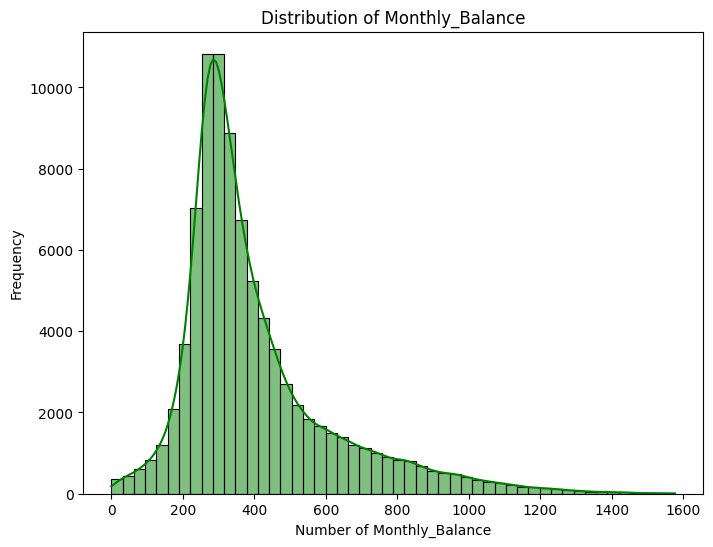

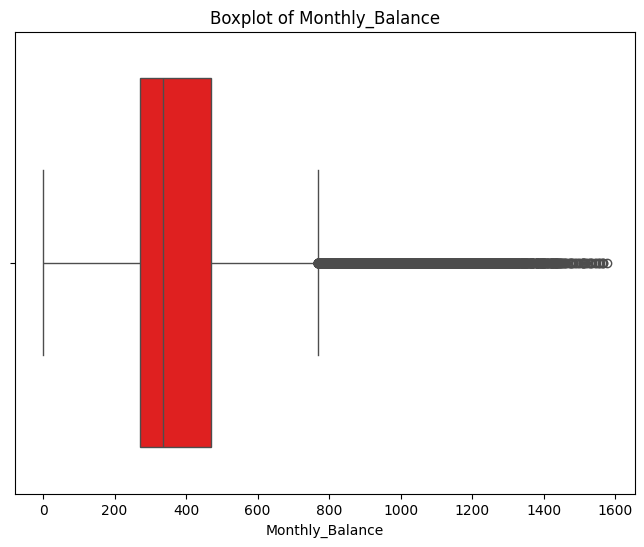

In [408]:
plt.figure(figsize=(8, 6))
sns.histplot(train_cs['Monthly_Balance'], bins=50, kde=True, color='green', alpha = 0.5)
plt.title("Distribution of Monthly_Balance")
plt.xlabel("Number of Monthly_Balance")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_cs['Monthly_Balance'], color='red')
plt.title("Boxplot of Monthly_Balance")
plt.show()

* As a financial metric, Monthly_Balance could have a strong relationship with the target variable (e.g., credit score)
* Preserving its original form ensures that its inherent pattern remains intact for modeling.
* Assuming it is a continuous variable with a wide range of values, any capping, transformation, or imputation might adversely affect its statistical and predictive properties.
* Extreme values in this column may reflect genuine scenarios (e.g., very high or very low balances) rather than outliers.

##**Categorical Columns**

In [409]:
train_cs.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,83992.000000,82181.000000,75129.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000,88356.000000
mean,3.477695,10.582639,4149.422311,5.425800,5.632690,14.877982,3.494998,21.154840,13.580594,10.587617,5.840928,1422.964411,32.299368,1407.407967,187.550210,402.304896
std,0.375858,0.970066,3164.217466,2.624287,2.144699,9.000715,2.362935,14.738988,5.961035,6.504760,3.826086,1145.712468,5.108643,8322.103231,182.818667,213.576688
min,2.890372,8.854512,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.881250,0.000000,0.000000,0.095482
25%,3.178054,9.868270,1619.936667,3.000000,4.000000,8.000000,2.000000,10.000000,10.000000,5.760000,3.000000,572.550000,28.067096,29.921581,71.672831,270.066552
50%,3.496508,10.515925,3050.206667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.780000,6.000000,1174.530000,32.321080,68.142341,127.387884,336.673665
75%,3.737670,11.186035,5902.378333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.650000,9.000000,1920.740000,36.508921,155.779989,230.580836,469.630098
max,4.787492,17.001783,15204.633333,10.000000,10.000000,33.000000,9.000000,67.000000,27.000000,36.970000,13.000000,4998.070000,50.000000,82331.000000,1646.388176,1576.288935


In [410]:
train_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88356 entries, 0 to 88355
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     88356 non-null  object 
 1   Age                       83992 non-null  float64
 2   Occupation                88356 non-null  object 
 3   Annual_Income             82181 non-null  float64
 4   Monthly_Inhand_Salary     75129 non-null  float64
 5   Num_Bank_Accounts         88356 non-null  float64
 6   Num_Credit_Card           88356 non-null  float64
 7   Interest_Rate             88356 non-null  float64
 8   Num_of_Loan               88356 non-null  float64
 9   Type_of_Loan              78142 non-null  object 
 10  Delay_from_due_date       88356 non-null  float64
 11  Num_of_Delayed_Payment    88356 non-null  float64
 12  Changed_Credit_Limit      88356 non-null  float64
 13  Num_Credit_Inquiries      88356 non-null  float64
 14  Credit

In [411]:
# Identify categorical columns based on data types
categorical_columns_train = train_cs.select_dtypes(include = ['object', 'category']).columns.tolist()
categorical_columns_test = test_cs.select_dtypes(include = ['object', 'category']).columns.tolist()


print("Categorical Columns In Train:", categorical_columns_train)
print("Categorical Columns In Test:", categorical_columns_test)

Categorical Columns In Train: ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
Categorical Columns In Test: ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']


### `Month`

In [412]:
print(train_cs['Month'].value_counts())

Month
July        11078
April       11075
January     11053
May         11053
February    11040
March       11031
August      11015
June        11011
Name: count, dtype: int64


In [413]:
print("Missing values in Train:", train_cs['Month'].isnull().sum())
print("Missing values in Test:", test_cs['Month'].isnull().sum())

Missing values in Train: 0
Missing values in Test: 0


<ipython-input-414-ef6f1c082569>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_cs, x='Month', order=train_cs['Month'].value_counts().index, palette='viridis')


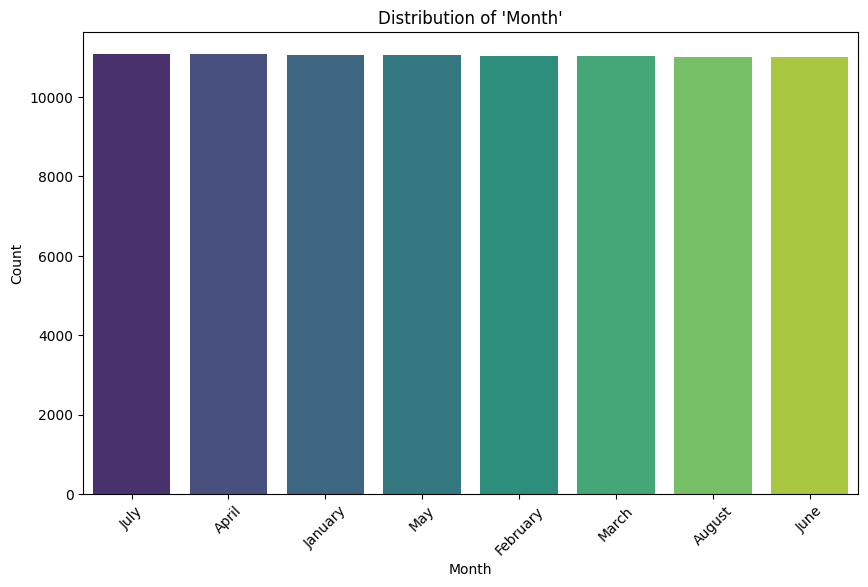

In [414]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_cs, x='Month', order=train_cs['Month'].value_counts().index, palette='viridis')
plt.title("Distribution of 'Month'")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### `Occupation`

In [415]:
print(train_cs['Occupation'].value_counts())

Occupation
_______          6243
Lawyer           5863
Engineer         5617
Mechanic         5578
Architect        5570
Accountant       5539
Scientist        5532
Developer        5529
Teacher          5504
Media_Manager    5497
Entrepreneur     5483
Journalist       5365
Doctor           5363
Manager          5290
Musician         5201
Writer           5182
Name: count, dtype: int64


* The `_` entry appears to be a placeholder for missing or invalid data.
` We can replace this with a meaningful value or a new category like "Unknown" or "Other".

In [416]:
print("Missing values in Train:", train_cs['Occupation'].isnull().sum())
print("Missing values in Test:", test_cs['Occupation'].isnull().sum())

Missing values in Train: 0
Missing values in Test: 0


In [417]:
train_cs[train_cs['Occupation'] == '_______']

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,January,NaN,_______,10.458746,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.420000,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
16,January,3.526361,_______,11.871737,12187.220000,1.0,5.0,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",5.0,8.0,7.100000,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413703,!@9#%8,1043.315978,Good
19,May,3.526361,_______,11.871737,12187.220000,1.0,5.0,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",10.0,5.0,7.100000,3.0,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good
26,June,4.007333,_______,10.331689,2612.490833,2.0,5.0,4.0,1.0,Not Specified,5.0,6.0,10.388997,4.0,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
38,February,3.433987,_______,11.210853,5988.705000,4.0,5.0,8.0,0.0,NaN,8.0,7.0,10.140000,2.0,Good,548.20,42.769864,32 Years and 0 Months,NM,0.000000,172.939214,Low_spent_Medium_value_payments,705.931286,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88282,January,3.610918,_______,11.847002,11777.746667,3.0,6.0,12.0,4.0,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14.0,12.0,18.390000,8.0,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.782346,High_spent_Large_value_payments,711.261305,Standard
88295,August,3.637586,_______,9.636892,1460.637500,6.0,7.0,15.0,4.0,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54.0,16.0,17.130000,6.0,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.877779,Low_spent_Small_value_payments,216.003938,Poor
88297,February,2.890372,_______,10.026625,1722.065833,7.0,3.0,9.0,3.0,NaN,25.0,14.0,5.310000,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.076293,Low_spent_Large_value_payments,337.130290,Standard
88303,August,3.871201,_______,10.026625,NaN,6.0,2.0,9.0,0.0,NaN,27.0,15.0,5.310000,2.0,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.217280,Low_spent_Small_value_payments,256.989303,Poor


In [418]:
train_cs['Occupation'] = train_cs['Occupation'].replace('_______', 'Others')
test_cs['Occupation'] = test_cs['Occupation'].replace('_______', 'Others')

<ipython-input-419-52646636ed27>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_cs, x='Occupation', order=train_cs['Occupation'].value_counts().index, palette='crest')


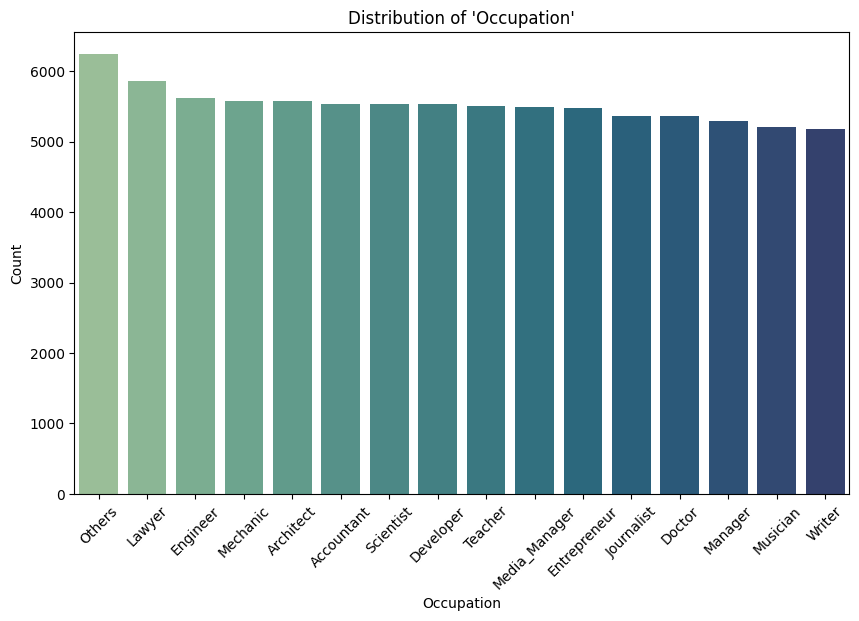

In [419]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_cs, x='Occupation', order=train_cs['Occupation'].value_counts().index, palette='crest')
plt.title("Distribution of 'Occupation'")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

###`Credit_Mix`

In [420]:
print(train_cs['Credit_Mix'].value_counts())

Credit_Mix
Standard    32296
Good        21484
_           17901
Bad         16675
Name: count, dtype: int64



It seems like the Credit_Mix column contains an invalid entry represented as` _`.

In [421]:
print("Missing values in Train:", train_cs['Credit_Mix'].isnull().sum())
print("Missing values in Test:", test_cs['Credit_Mix'].isnull().sum())

Missing values in Train: 0
Missing values in Test: 0


In [422]:
# Replacing '_' by Average
train_cs['Credit_Mix'] = train_cs['Credit_Mix'].replace('_', 'Average')
test_cs['Credit_Mix'] = test_cs['Credit_Mix'].replace('_', 'Average')

<ipython-input-423-05b7d8996cc6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_cs, y='Credit_Mix', order=train_cs['Credit_Mix'].value_counts().index, palette='rocket_r')


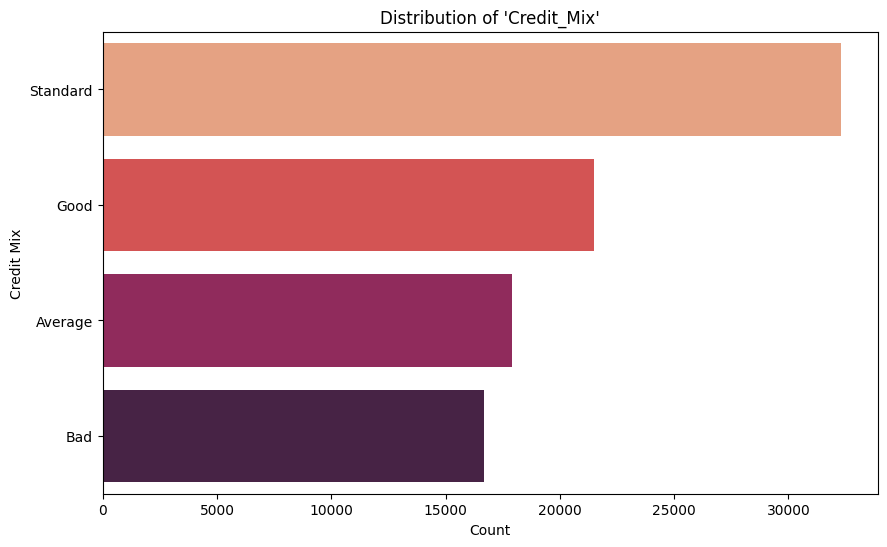

In [423]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_cs, y='Credit_Mix', order=train_cs['Credit_Mix'].value_counts().index, palette='rocket_r')
plt.title("Distribution of 'Credit_Mix'")
plt.xlabel("Count")
plt.ylabel("Credit Mix")
plt.show()

### `Payment_of_Min_Amount`

In [424]:
print(train_cs['Payment_of_Min_Amount'].value_counts())

Payment_of_Min_Amount
Yes    46217
No     31535
NM     10604
Name: count, dtype: int64


The value NM in the column Payment_of_Min_Amount likely stands for "Not Mentioned" or "No Minimum", which could represent cases where either the data is missing or the individual isn't required to pay a minimum amount.

In [425]:
print("Missing values in Train:", train_cs['Payment_of_Min_Amount'].isnull().sum())
print("Missing values in Test:", test_cs['Payment_of_Min_Amount'].isnull().sum())

Missing values in Train: 0
Missing values in Test: 0


<ipython-input-426-45033097e365>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_cs, x='Payment_of_Min_Amount', order=train_cs['Payment_of_Min_Amount'].value_counts().index, palette='mako')


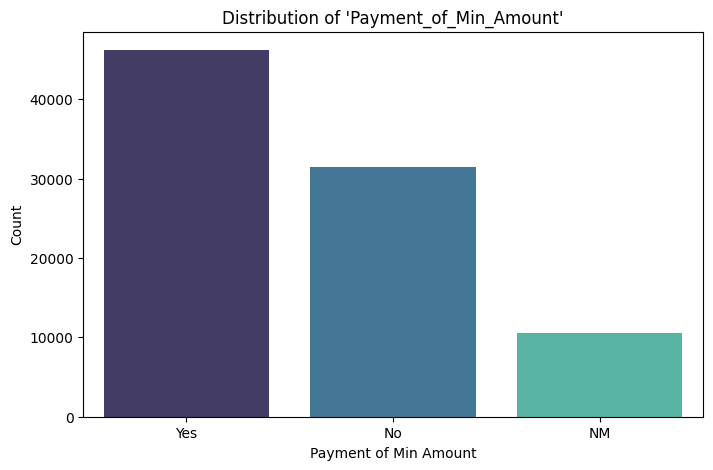

In [426]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_cs, x='Payment_of_Min_Amount', order=train_cs['Payment_of_Min_Amount'].value_counts().index, palette='mako')
plt.title("Distribution of 'Payment_of_Min_Amount'")
plt.xlabel("Payment of Min Amount")
plt.ylabel("Count")
plt.show()

The value NM will remain unchanged as it might carry important information or represent unique cases like "Not Mentioned" or "No Minimum."

### `Type_of_Loan`

In [427]:
train_cs['Type_of_Loan'].value_counts().head(15)

,count
Type_of_Loan,
Not Specified,1259
Personal Loan,1150
Credit-Builder Loan,1148
Debt Consolidation Loan,1123
Student Loan,1098
Payday Loan,1053
Mortgage Loan,1044
Auto Loan,1021
Home Equity Loan,993


Reasons to Consider Dropping `Type_of_Loan`:
* If other columns (e.g., Payment_Behaviour, Credit_History_Age) already provide insights into financial behavior, this column might not contribute much additional information.
* The column is messy, with combinations of loan types making it hard to extract clean insights.
* This complexity might not add significant predictive power for your target variable.
* It strongly feel it’s not useful, drop it to keep the dataset simpler.


In [428]:
train_cs = train_cs.drop(columns = ['Type_of_Loan'], axis = 1)
test_cs = test_cs.drop(columns = ['Type_of_Loan'], axis = 1)

### `Credit_History_Age`

In [429]:
train_cs['Credit_History_Age'].value_counts()

,count
Credit_History_Age,
19 Years and 4 Months,402
15 Years and 11 Months,396
17 Years and 11 Months,392
19 Years and 3 Months,391
19 Years and 5 Months,390
...,...
0 Years and 3 Months,17
33 Years and 7 Months,14
0 Years and 2 Months,13


In [430]:
train_cs['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '18 Years and 1 Months', '18 Years and 2 Months',
       '18 Years and 3 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 8 Months',
       '30 Years and 8 Months', '30 Years and 9 Months',
       '30 Years and 10 Months', '30 Years and 11 Months',
       '31 Years and 0 Months', '31 Years and 1 Months',
       '31 Years and 2 Months', '31 Years and 3 Months',
       '32 Years and 0 Months', '32 Years and 2 Months',
       '32 Years and 

**Calculate the month from the entire string**

In [431]:
import re

def convert_age_to_months(history_age):
    if pd.notna(history_age):  # NaN checking
        match = re.match(r"(\d+) Years\s*and\s*(\d+) Months", history_age)  # Regex
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            total_months = years * 12 + months
            return total_months
    return np.nan  #Return NaN if there is no match or if it is NaN

In [432]:
train_cs["credit_history_age_regulated"] = train_cs["Credit_History_Age"].transform(convert_age_to_months)
test_cs["credit_history_age_regulated"] = test_cs["Credit_History_Age"].transform(convert_age_to_months)

In [433]:
train_cs["Credit_History_Age"] = train_cs["credit_history_age_regulated"]
test_cs["Credit_History_Age"] = test_cs["credit_history_age_regulated"]

In [434]:
train_cs["Credit_History_Age"]

,Credit_History_Age
0,265.0
1,NaN
2,267.0
3,268.0
4,269.0
...,...
88351,378.0
88352,379.0
88353,380.0
88354,381.0


In the function we wrote, we convert the years in the dataset into months, and we can observe the ordering of the values here. This helps in analyzing the data with a monthly perspective rather than yearly.

In [435]:
train_cs["Credit_History_Age"].describe()

,Credit_History_Age
count,80372.000000
mean,221.415431
std,99.658632
min,1.000000
25%,145.000000
50%,220.000000
75%,302.000000
max,404.000000


In [436]:
print('Percentage of missing values in Train:', train_cs['Credit_History_Age'].isnull().sum() / len(train_cs['Credit_History_Age'])*100)
print('Percentage of missing values in Test:', test_cs['Credit_History_Age'].isnull().sum() / len(test_cs['Credit_History_Age'])*100)

Percentage of missing values in Train: 9.036171850242201
Percentage of missing values in Test: 8.938813447892816


In [437]:
from sklearn.impute import KNNImputer

# Selecting the 'Credit_History_Age' column for KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors for imputation


train_cs['Credit_History_Age'] = knn_imputer.fit_transform(train_cs[['Credit_History_Age']])
test_cs['Credit_History_Age'] = knn_imputer.transform(test_cs[['Credit_History_Age']])

In [438]:
print(train_cs['Credit_History_Age'].isnull().sum())
print(test_cs['Credit_History_Age'].isnull().sum())

0
0


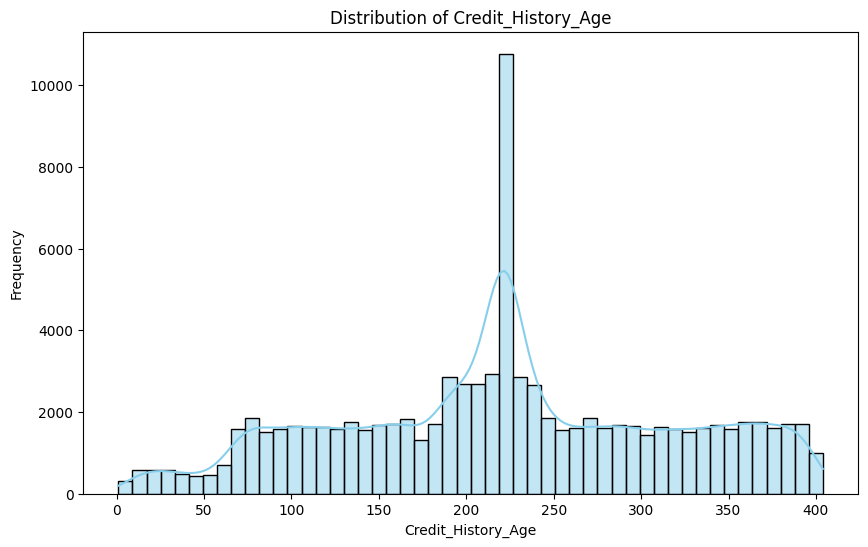

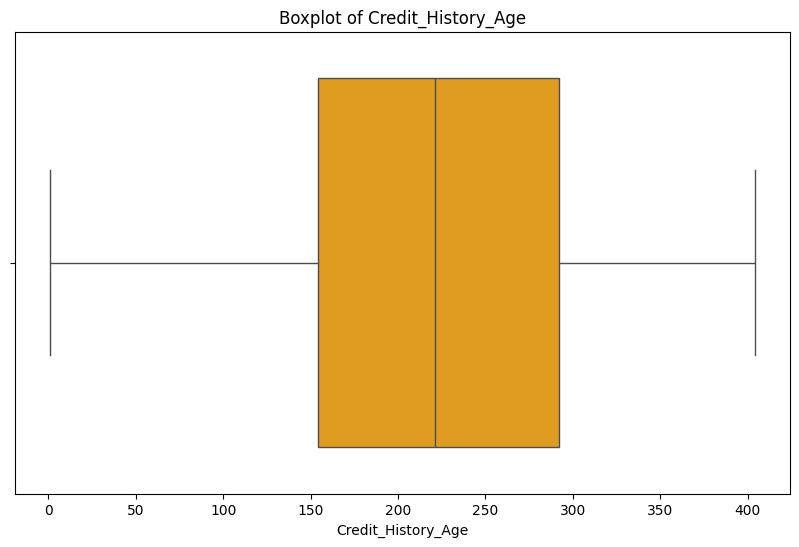

In [439]:
plt.figure(figsize=(10, 6))
sns.histplot(train_cs['Credit_History_Age'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Credit_History_Age")
plt.xlabel("Credit_History_Age")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=train_cs['Credit_History_Age'], color='orange')
plt.title("Boxplot of Credit_History_Age")
plt.show()

### `Payment_Behaviour`

In [440]:
train_cs['Payment_Behaviour']

,Payment_Behaviour
0,High_spent_Small_value_payments
1,Low_spent_Large_value_payments
2,Low_spent_Medium_value_payments
3,Low_spent_Small_value_payments
4,High_spent_Medium_value_payments
...,...
88351,High_spent_Large_value_payments
88352,High_spent_Medium_value_payments
88353,High_spent_Large_value_payments
88354,Low_spent_Large_value_payments


In [441]:
train_cs['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,22063
High_spent_Medium_value_payments,15722
Low_spent_Medium_value_payments,12264
High_spent_Large_value_payments,12247
High_spent_Small_value_payments,10098
Low_spent_Large_value_payments,9265
!@9#%8,6697


In [443]:
# Replace invalid values with 'Unknown'
train_cs['Payment_Behaviour'] = train_cs['Payment_Behaviour'].replace('!@9#%8', 'Unknown')
test_cs['Payment_Behaviour'] = test_cs['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

<ipython-input-444-f4f1f50581d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_cs, x='Payment_Behaviour', order=train_cs['Payment_Behaviour'].value_counts().index, palette='mako')


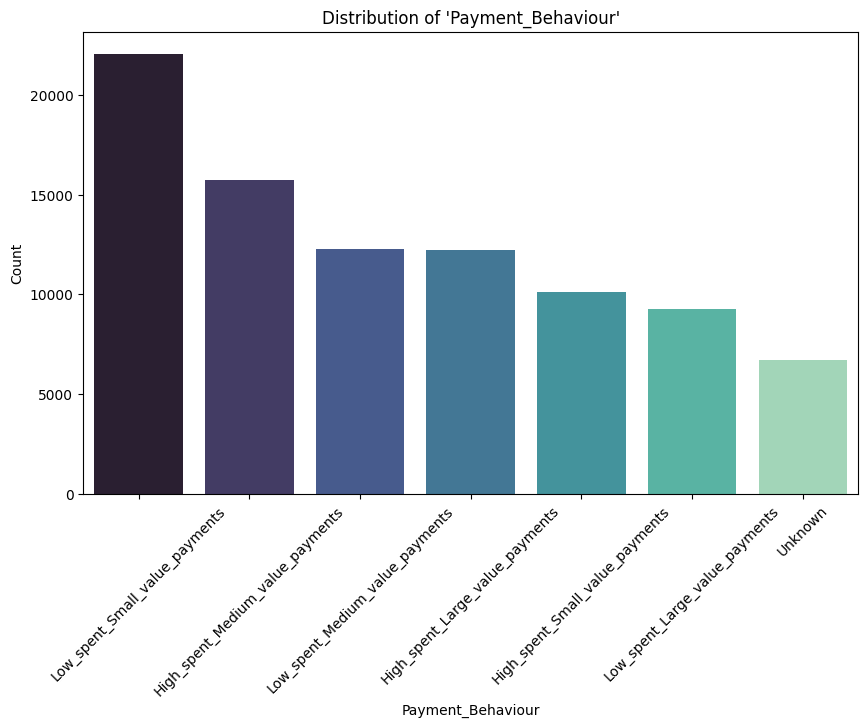

In [444]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_cs, x='Payment_Behaviour', order=train_cs['Payment_Behaviour'].value_counts().index, palette='mako')
plt.title("Distribution of 'Payment_Behaviour'")
plt.xlabel("Payment_Behaviour")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [445]:
# # Save the preprocessed train dataset
train_cs.to_csv('data_assessing_and_univaraiate_train.csv', index = False)

# Save the preprocessed test dataset
test_cs.to_csv('data_assessing_and_univaraiate_test.csv', index=False)

print('Files saved successfully!')

Files saved successfully!
